## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
import time
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn import metrics

## Import cleaned data

In [2]:
df = pd.read_csv('06_20522079_CleanData.csv')

In [3]:
df.columns

Index(['Block', 'IUCR', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude',
       'Longitude', 'Location', 'Month', 'Day', 'Hour', 'Minute', 'Second'],
      dtype='object')

In [4]:
df

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
0,0,0,0,0,0,False,False,1022,10.0,24.0,...,1889214.0,2013,41.851794,-87.703117,0,1,26,3,0,0
1,1,1,1,1,1,False,False,915,9.0,11.0,...,1883498.0,2012,41.835708,-87.634042,1,5,18,20,0,0
2,2,2,2,2,2,False,True,331,3.0,5.0,...,1860098.0,2013,41.771073,-87.568279,2,9,18,8,45,0
3,3,3,3,3,3,True,False,823,8.0,15.0,...,1862369.0,2013,41.778084,-87.695803,3,11,22,14,58,0
4,4,4,0,4,4,False,False,925,9.0,11.0,...,1879030.0,2014,41.823499,-87.642613,4,10,10,7,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,14966,17,9,17,11,True,False,632,6.0,6.0,...,1847510.0,2014,41.736886,-87.624171,28083,7,9,12,30,0
99996,2909,20,2,20,2,False,False,1513,15.0,29.0,...,1895091.0,2014,41.868285,-87.773003,68654,12,10,11,30,0
99997,4436,26,0,26,1,False,False,1431,14.0,1.0,...,1915844.0,2016,41.924829,-87.695131,68655,12,8,19,0,0
99998,2959,0,0,0,18,False,False,114,1.0,42.0,...,1902638.0,2014,41.888165,-87.622937,3309,6,18,14,30,0


## Feature selection using Filter Method
## Split dataframe to label class and features

In [5]:
X = df.drop(['Primary Type'], axis = 1)
Y = df['Primary Type']

## Using Pearson Correlation


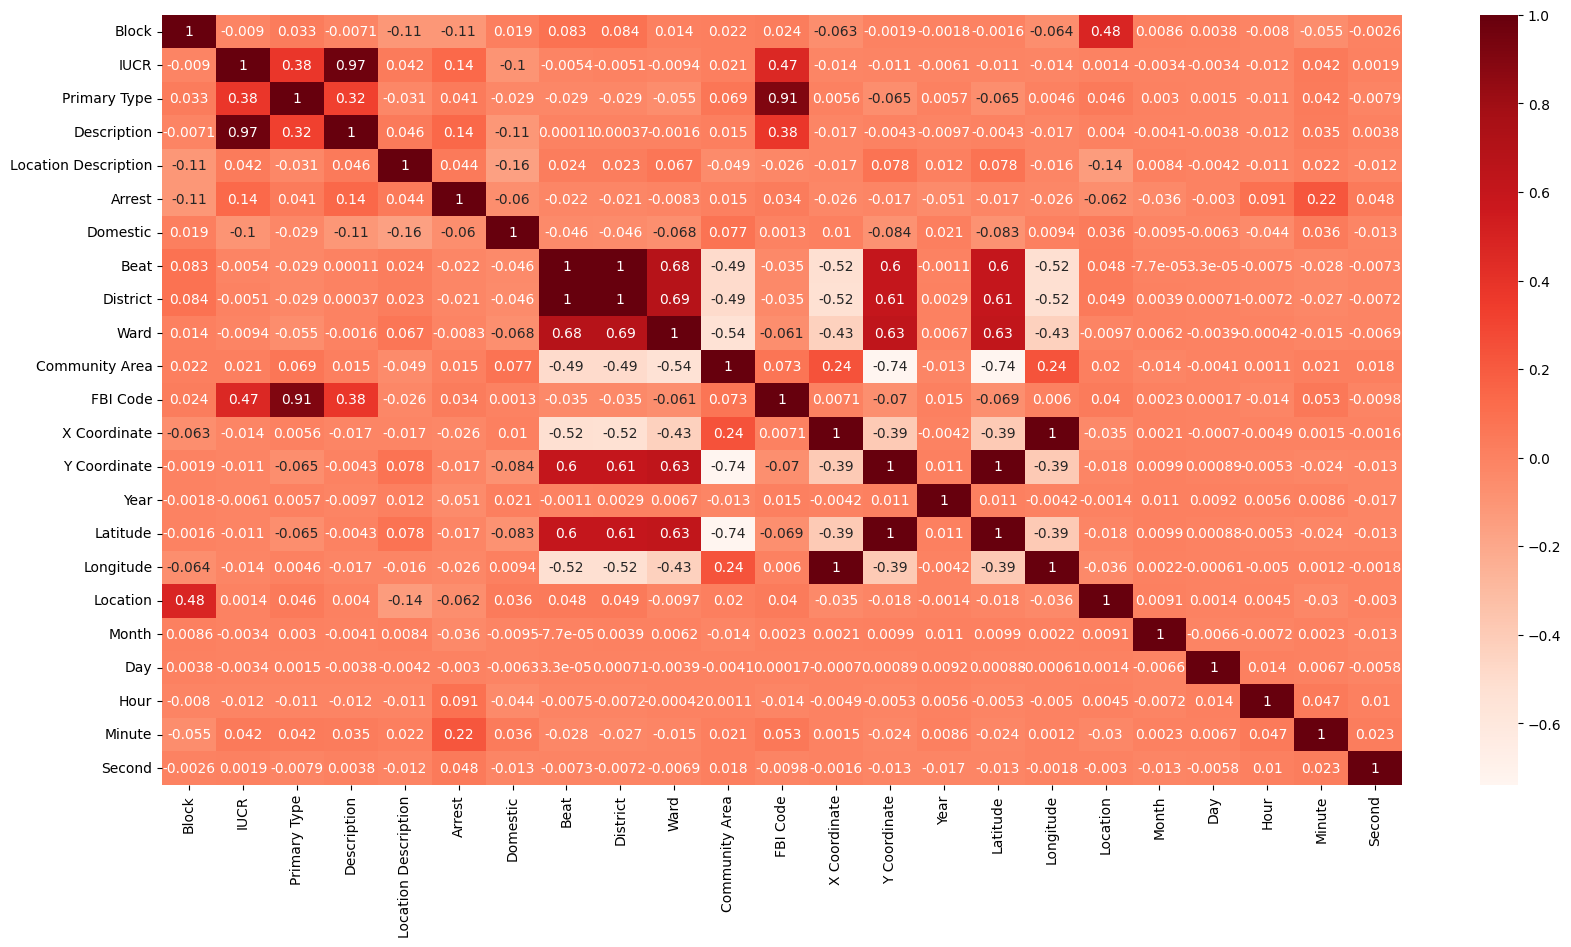

In [6]:
plt.figure(figsize=(20, 10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Filtering attributes with high correlation to the target attribute

In [7]:
#Correlation with output variable
cor_Label = abs(cor['Primary Type'])

#Selecting highly correlated features
relevant_features = cor_Label[cor_Label>0.2]
relevant_features

IUCR            0.378521
Primary Type    1.000000
Description     0.321056
FBI Code        0.910627
Name: Primary Type, dtype: float64

## Select Features and Label

In [8]:
Features = df[["IUCR", "Description", "FBI Code"]]
Label = df["Primary Type"]

In [9]:
Label.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64)

## Split data into train:test = 7:3

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(Features,Label,test_size=0.3,random_state=42)

# 1. Decision Tree Implementation

## Build ID3 Tree

In [12]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)

start_time_Decision_Tree = time.time()

clf.fit(X_train, y_train)

end_time_Decision_Tree = time.time()

In [13]:
tree_pred = clf.predict(X_test)

tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy: ", tree_score)
print("Report: ", metrics.classification_report(y_test, tree_pred))

Accuracy:  0.9998
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      6832
           1       1.00      1.00      1.00      1277
           2       1.00      1.00      1.00      5493
           3       1.00      1.00      1.00      2784
           4       0.99      0.98      0.99       131
           5       1.00      1.00      1.00      3205
           6       1.00      1.00      1.00      1435
           7       1.00      1.00      1.00      1827
           8       1.00      1.00      1.00      1161
           9       1.00      1.00      1.00       791
          10       1.00      1.00      1.00       152
          11       1.00      1.00      1.00       162
          12       1.00      1.00      1.00       370
          13       1.00      1.00      1.00       209
          14       1.00      1.00      1.00       271
          15       1.00      1.00      1.00      1839
          16       1.00      1.00      1.00      1751


In [14]:
running_time_Decision_Tree = end_time_Decision_Tree - start_time_Decision_Tree
print("The running time of the model: ", running_time_Decision_Tree, "second")

The running time of the model:  0.052251338958740234 second


In [15]:
DecisionTree_ac_sc = accuracy_score(y_test, tree_pred)
DecisionTree_rc_sc = recall_score(y_test, tree_pred, average="weighted")
DecisionTree_pr_sc = precision_score(y_test, tree_pred,average="weighted")
DecisionTree_f1_sc = f1_score(y_test, tree_pred,average="micro")
print("Accuracy : ",DecisionTree_ac_sc)
print("Recall   : ",DecisionTree_rc_sc)
print("Precision: ",DecisionTree_pr_sc)
print("F1 Score :",DecisionTree_f1_sc)

Accuracy :  0.9998
Recall   :  0.9998
Precision:  0.9997999379625869
F1 Score : 0.9998


In [16]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

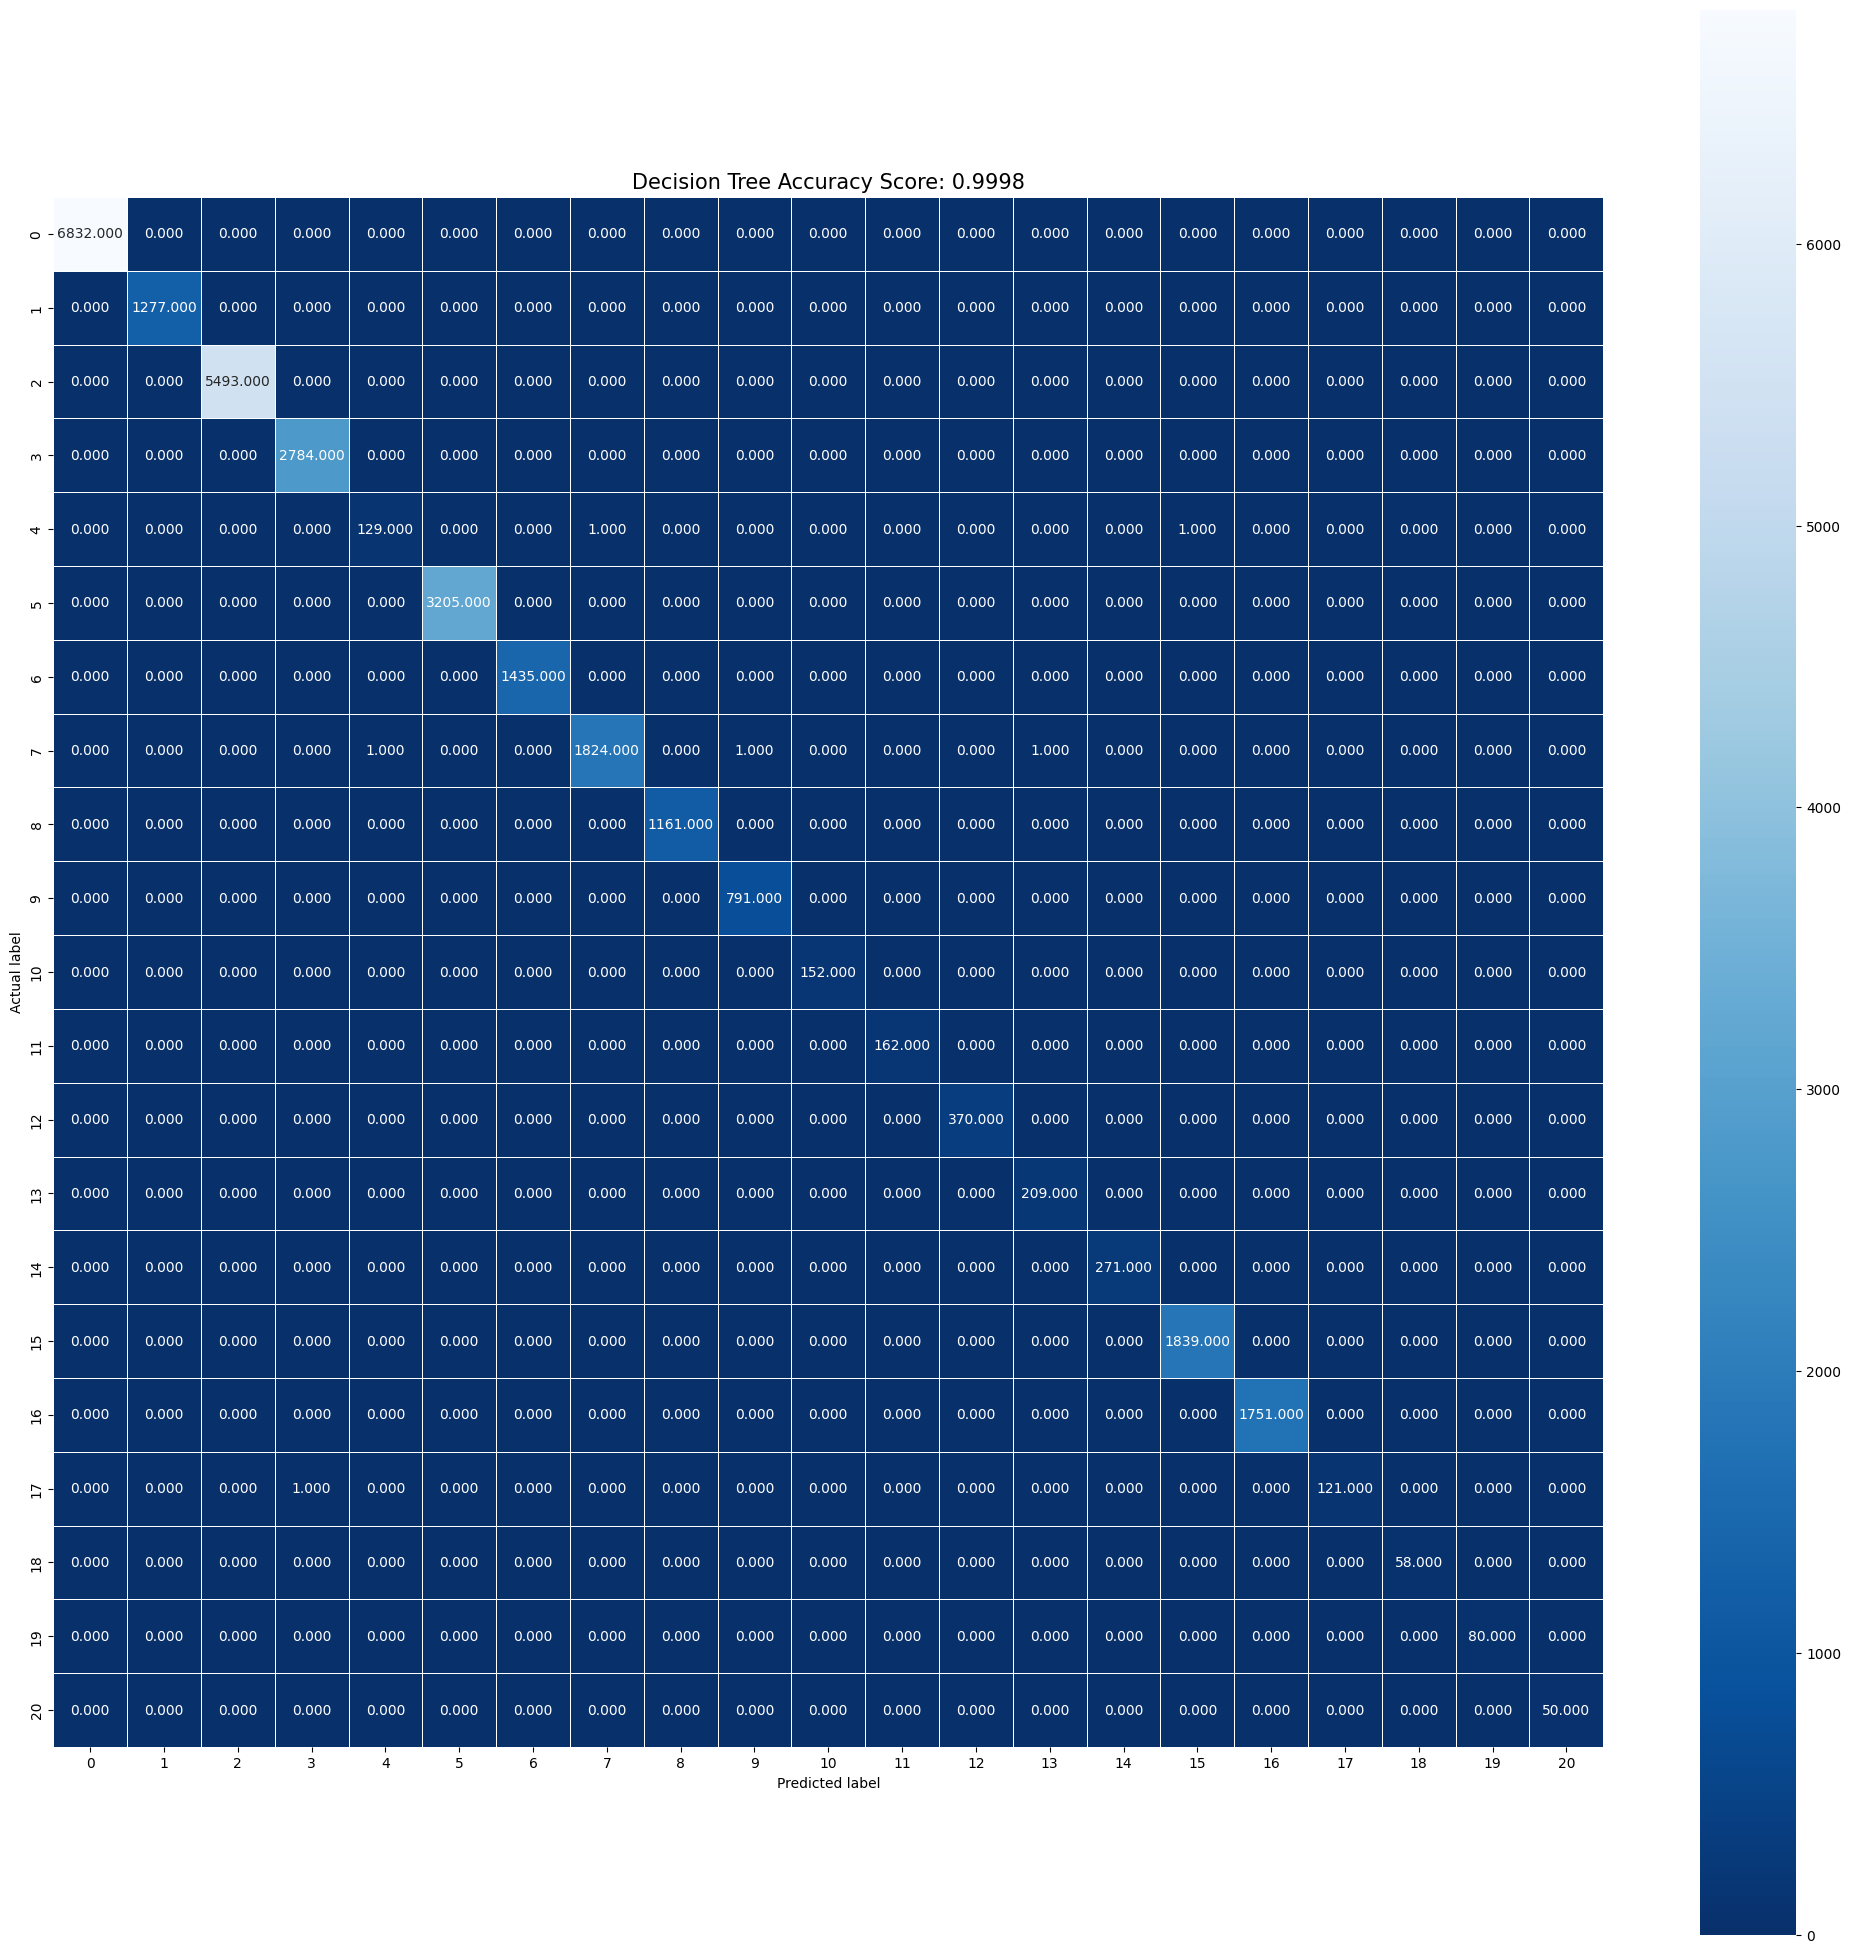

In [17]:
plt.figure(figsize=(25,25))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.xlabel('Predicted label');
plt.ylabel('Actual label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size = 15);

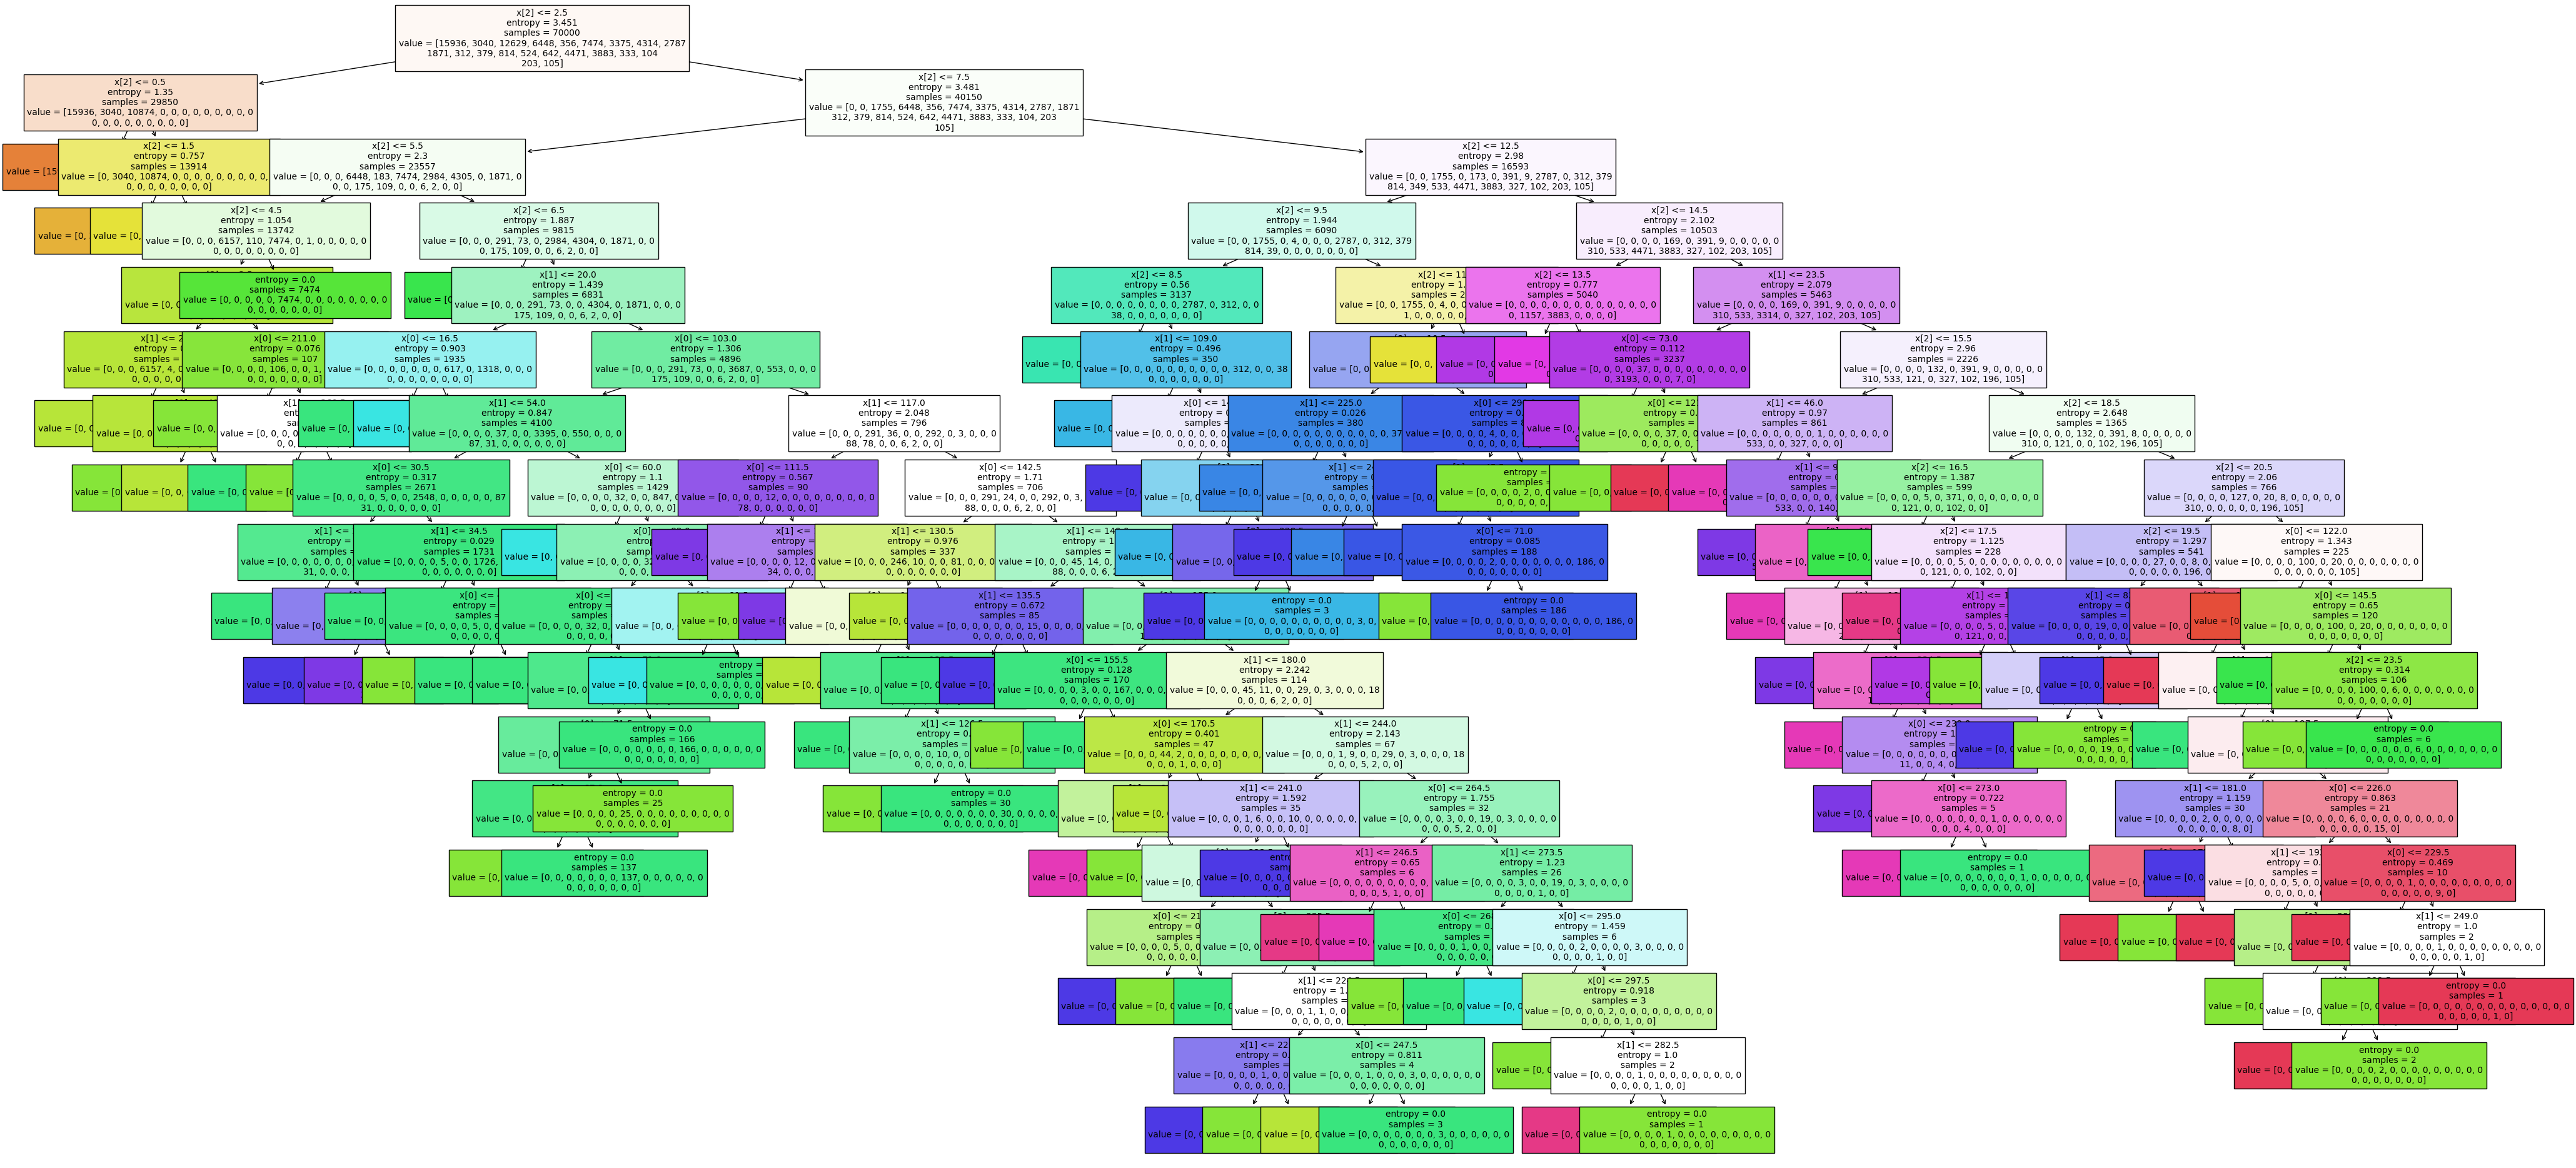

In [18]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.show()

## CART

In [19]:
clf1 = tree.DecisionTreeClassifier(criterion="gini",random_state=0)
start_time_Cart = time.time()
clf1.fit(X_train,y_train)
end_time_Cart = time.time()

In [20]:
running_time_Decision_Tree_Cart = end_time_Cart - start_time_Cart
print("The running time of the model: ", running_time_Decision_Tree_Cart, "second")

The running time of the model:  0.08074808120727539 second


In [21]:
tree_pred_CART = clf1.predict(X_test)
tree_score_CART = metrics.accuracy_score(y_test,tree_pred_CART)
print("Accruracy:",tree_score_CART)
print("Report:",metrics.classification_report(y_test,tree_pred_CART))

Accruracy: 0.9998
Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6832
           1       1.00      1.00      1.00      1277
           2       1.00      1.00      1.00      5493
           3       1.00      1.00      1.00      2784
           4       0.99      0.98      0.99       131
           5       1.00      1.00      1.00      3205
           6       1.00      1.00      1.00      1435
           7       1.00      1.00      1.00      1827
           8       1.00      1.00      1.00      1161
           9       1.00      1.00      1.00       791
          10       1.00      1.00      1.00       152
          11       1.00      1.00      1.00       162
          12       1.00      1.00      1.00       370
          13       1.00      1.00      1.00       209
          14       1.00      1.00      1.00       271
          15       1.00      1.00      1.00      1839
          16       1.00      1.00      1.00      1751
 

In [22]:
CART_ac_sc = accuracy_score(y_test, tree_pred_CART)
CART_rc_sc = recall_score(y_test, tree_pred_CART, average="weighted")
CART_pr_sc = precision_score(y_test, tree_pred_CART,average="weighted")
CART_f1_sc = f1_score(y_test, tree_pred_CART,average="micro")
print("Accuracy : ",CART_ac_sc)
print("Recall   : ",CART_rc_sc)
print("Precision: ",CART_pr_sc)
print("F1 Score :",CART_f1_sc)

Accuracy :  0.9998
Recall   :  0.9998
Precision:  0.9997999379625869
F1 Score : 0.9998


In [23]:
confusion_maxtrix = metrics.confusion_matrix(y_test,tree_pred_CART)

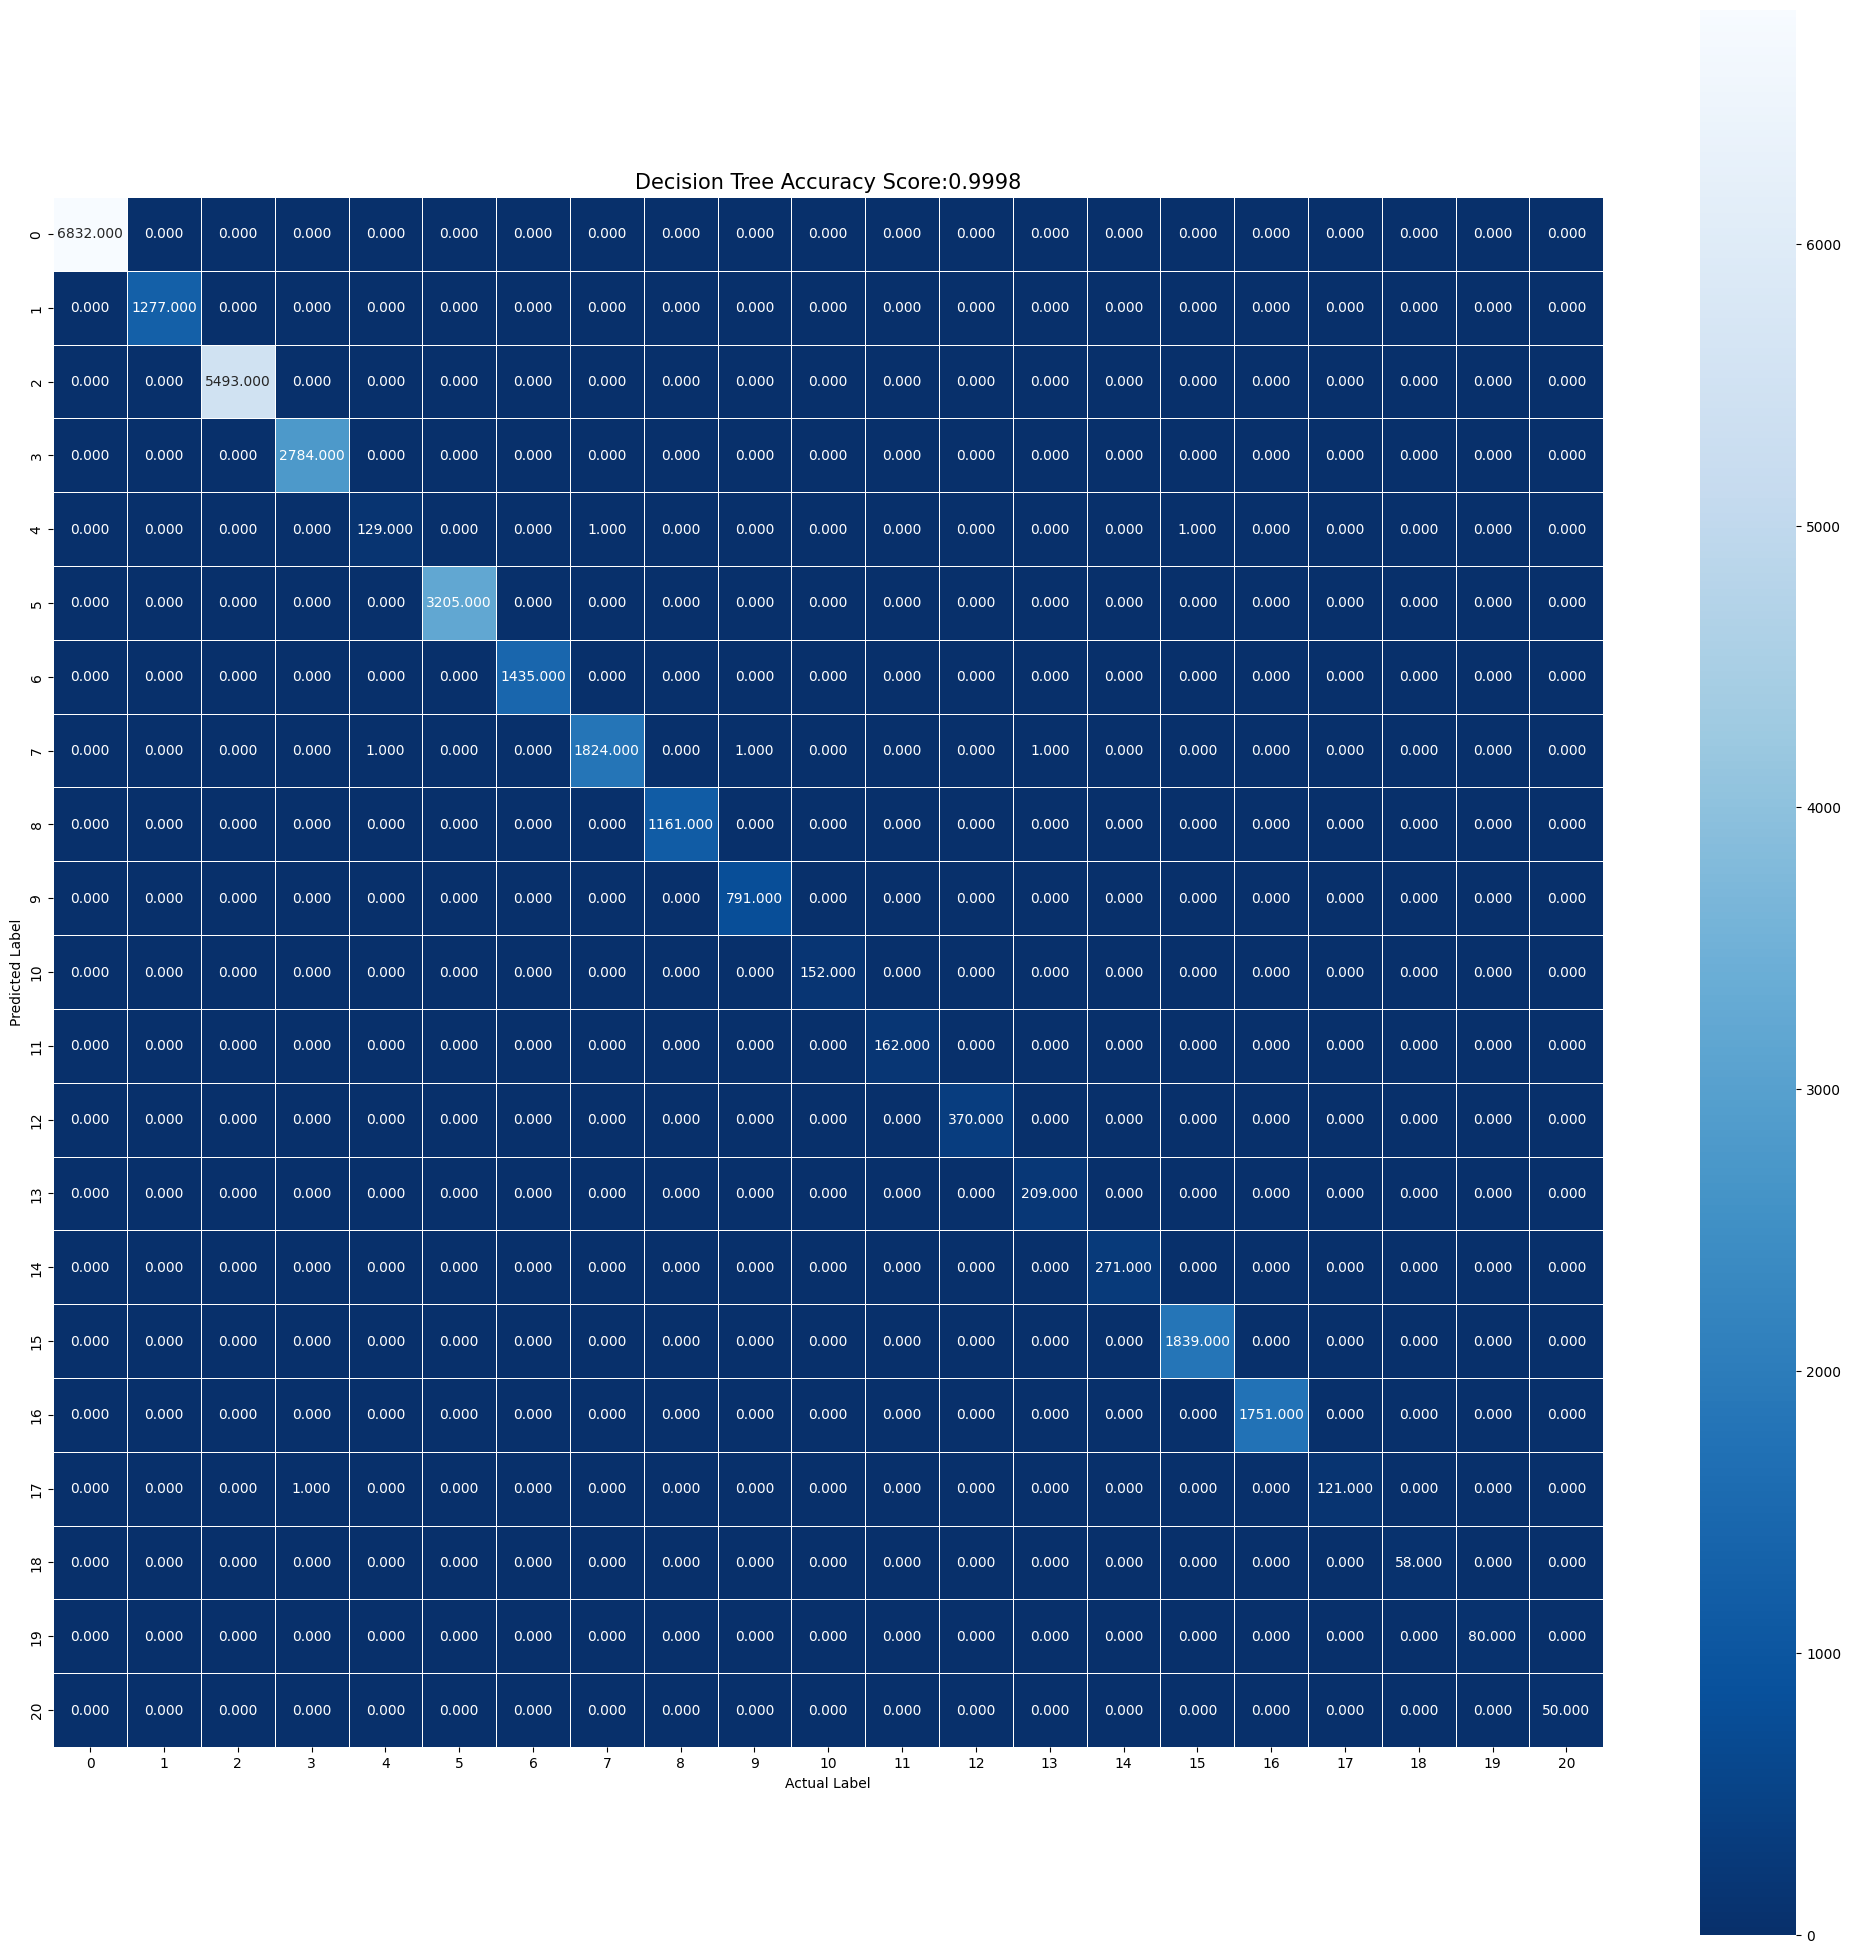

In [24]:
plt.figure(figsize=(25,25))
sns.heatmap(confusion_maxtrix,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='Decision Tree Accuracy Score:{0}'.format(tree_score)
plt.title(title,size=15);

# 2. Naive Bayes Implementation

In [25]:
gnb = GaussianNB()

start_time_Bayes = time.time()

gnb.fit(X_train, y_train)

end_time_Bayes = time.time()

In [26]:
bayes_pred = gnb.predict(X_test)

In [27]:
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy: ", bayes_score)
print("Report: ", metrics.classification_report(y_test, bayes_pred))

Accuracy:  0.7669
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      6832
           1       1.00      0.99      1.00      1277
           2       0.61      0.85      0.71      5493
           3       0.83      0.18      0.30      2784
           4       0.18      0.50      0.26       131
           5       1.00      1.00      1.00      3205
           6       0.30      0.08      0.12      1435
           7       0.06      0.01      0.02      1827
           8       1.00      0.99      1.00      1161
           9       0.30      1.00      0.46       791
          10       0.96      1.00      0.98       152
          11       1.00      1.00      1.00       162
          12       1.00      0.99      1.00       370
          13       0.39      0.49      0.43       209
          14       0.16      0.04      0.07       271
          15       0.65      0.97      0.78      1839
          16       1.00      0.98      0.99      1751


D:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
running_time_Bayes = end_time_Bayes - start_time_Bayes
print("The running time of the model: ", running_time_Bayes, "second")

The running time of the model:  0.031001567840576172 second


In [29]:
Bayes_ac_sc = accuracy_score(y_test, bayes_pred)
Bayes_rc_sc = recall_score(y_test, bayes_pred, average="weighted")
Bayes_pr_sc = precision_score(y_test, bayes_pred,average="weighted")
Bayes_f1_sc = f1_score(y_test, bayes_pred,average="micro")
print("Accuracy : ",Bayes_ac_sc)
print("Recall   : ",Bayes_rc_sc)
print("Precision: ",Bayes_pr_sc)
print("F1 Score :",Bayes_f1_sc)

Accuracy :  0.7669
Recall   :  0.7669
Precision:  0.7624796824687705
F1 Score : 0.7669


D:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Navie Bayes Accuracy Score: 0.7669')

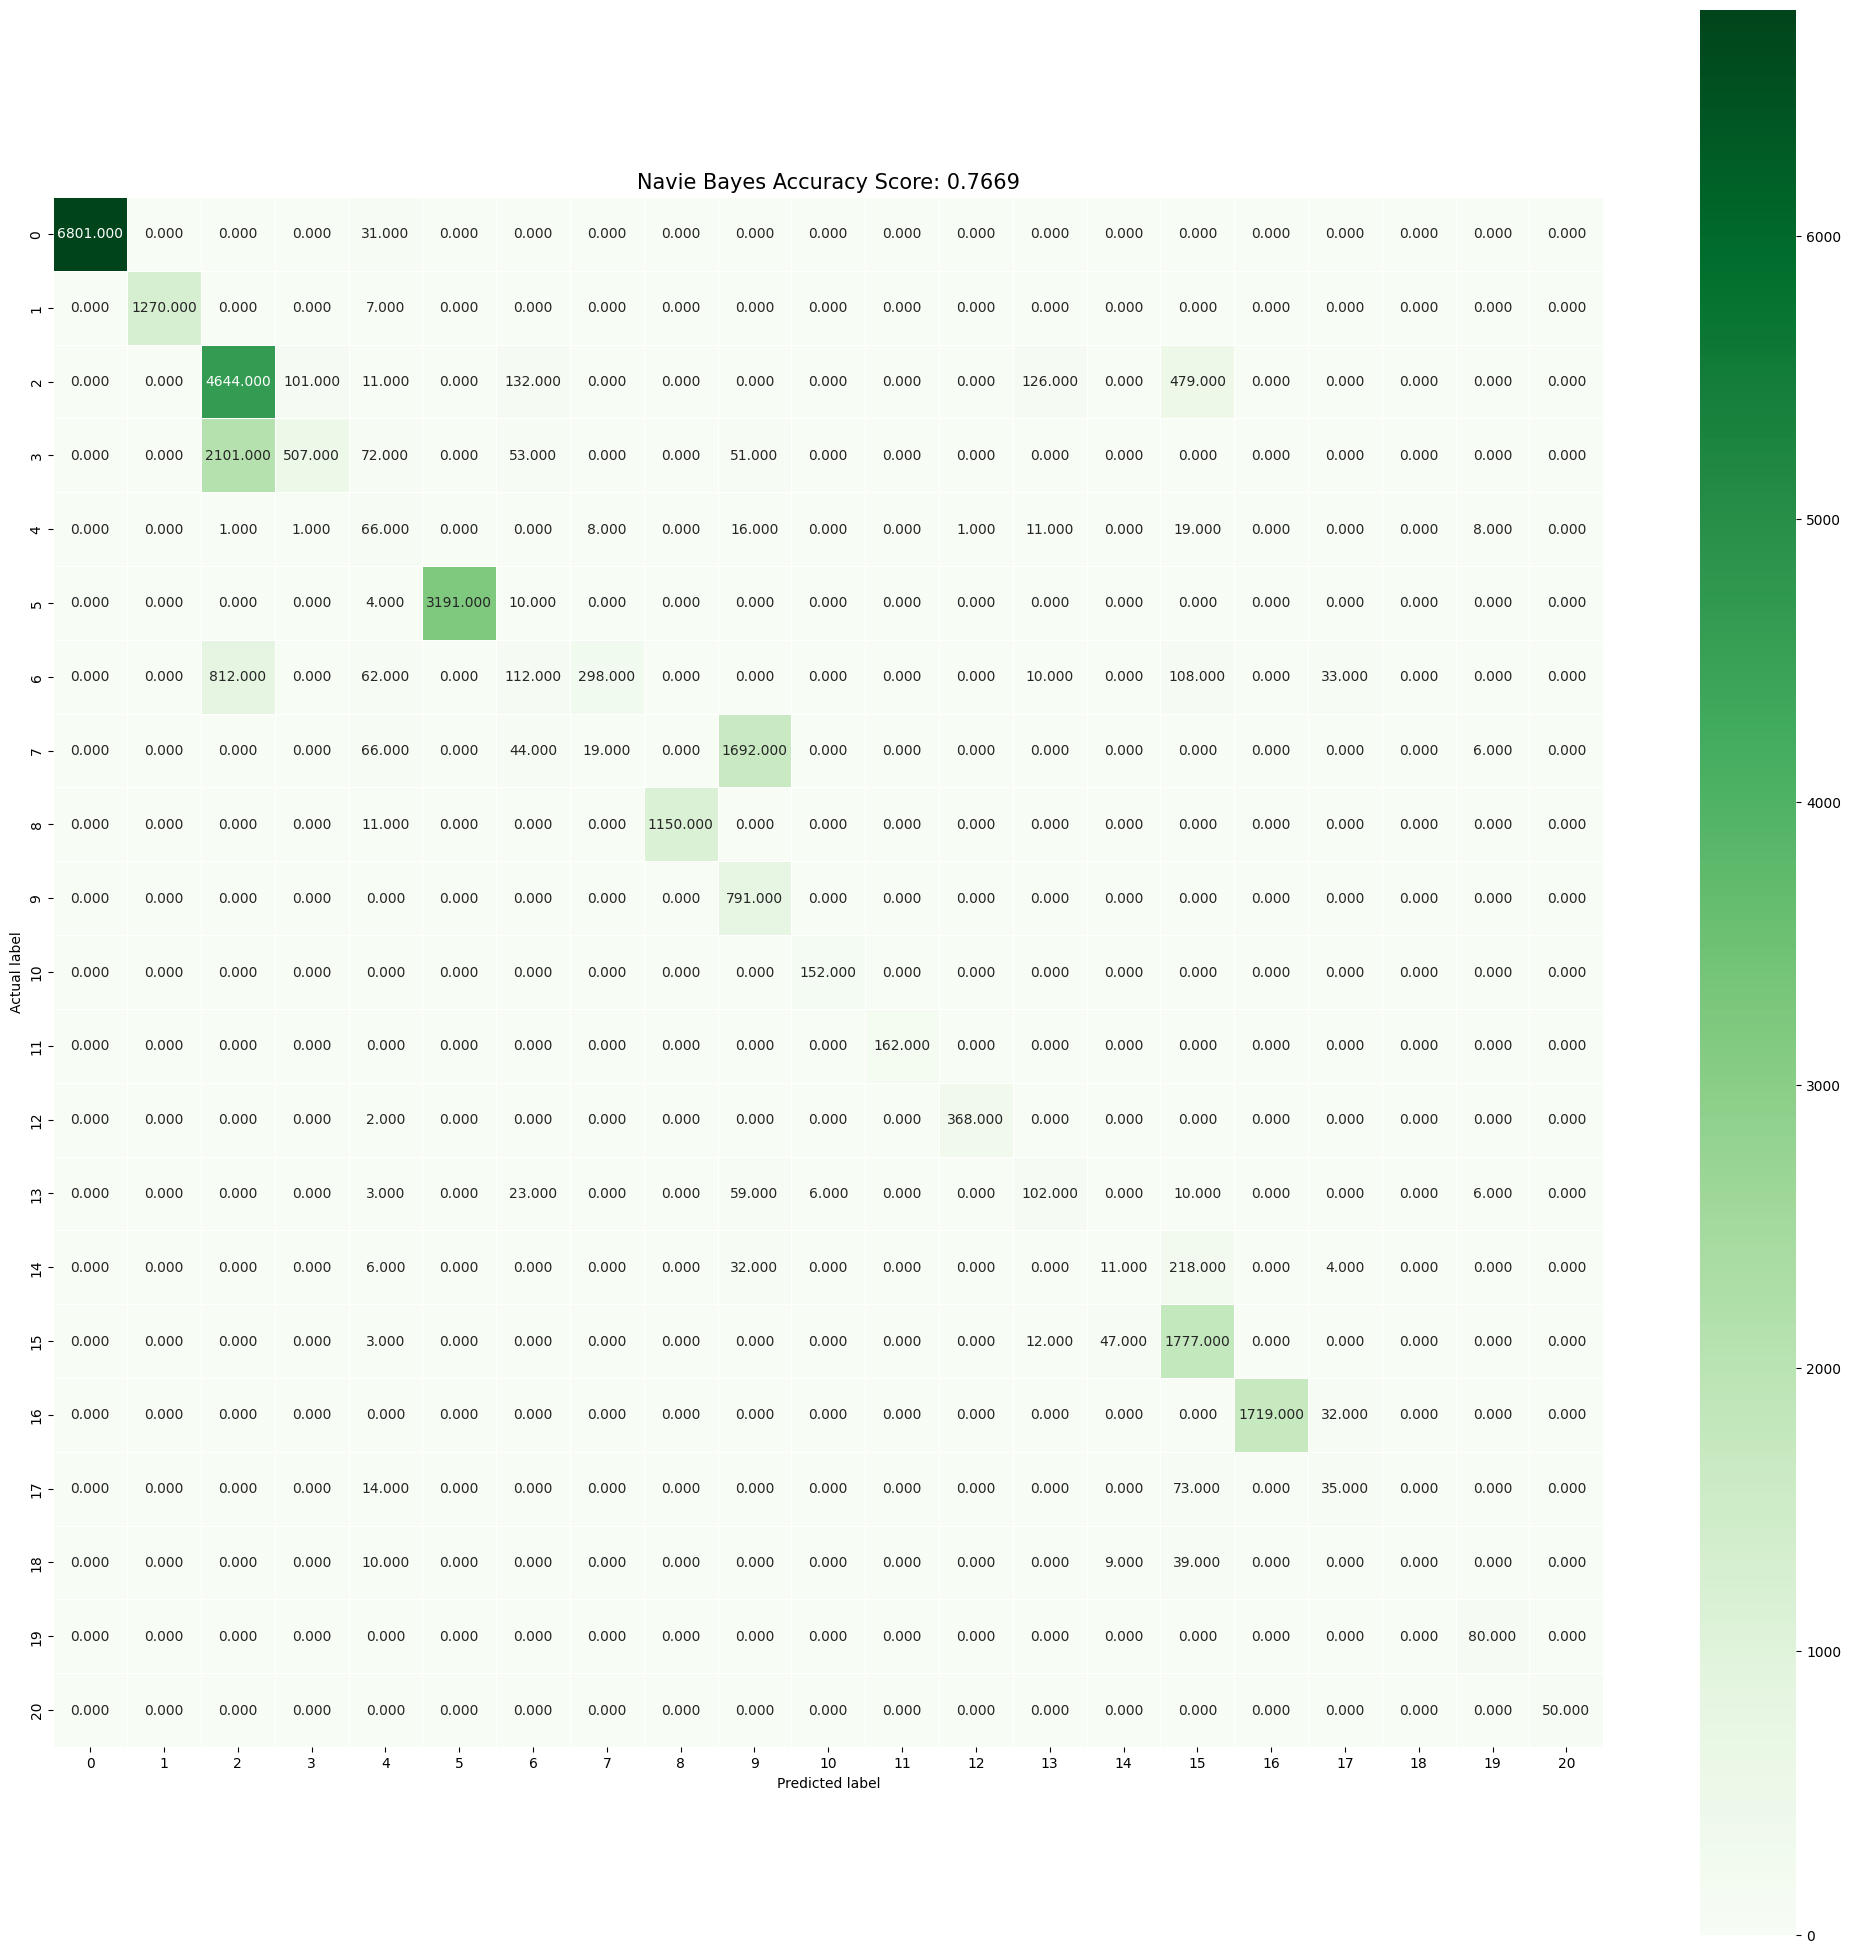

In [30]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
plt.figure(figsize=(25,25))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square =True, cmap ='Greens')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
title = 'Navie Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size=15)

# 3. SVM Implementation

In [31]:
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn import metrics

In [34]:
# Built SVM model
model_SVM = svm.SVC()

start_time_SVM = time.time()

# Train the model
model_SVM.fit(X_train, y_train)

end_time_SVM = time.time()

# Predict
y_pred_SVM = model_SVM.predict(X_test)

In [35]:
SVM_score = metrics.accuracy_score(y_test, y_pred_SVM)
print("Accuracy: ", SVM_score)
print("Report: ", metrics.classification_report(y_test, y_pred_SVM))

Accuracy:  0.8456333333333333
Report:                precision    recall  f1-score   support

           0       0.99      1.00      1.00      6832
           1       0.97      0.95      0.96      1277
           2       0.99      0.91      0.95      5493
           3       0.87      0.98      0.92      2784
           4       0.48      0.39      0.43       131
           5       0.91      0.95      0.93      3205
           6       0.34      0.32      0.33      1435
           7       0.57      0.69      0.62      1827
           8       0.52      0.80      0.63      1161
           9       1.00      0.09      0.17       791
          10       1.00      0.06      0.11       152
          11       0.00      0.00      0.00       162
          12       0.73      0.80      0.76       370
          13       0.60      0.40      0.48       209
          14       0.00      0.00      0.00       271
          15       0.86      0.91      0.88      1839
          16       0.75      0.93      0.8

D:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
running_time_SVM = end_time_SVM - start_time_SVM
print("The running time of SVM:", running_time_SVM, "second")

The running time of SVM: 93.4600305557251 second


In [37]:
SVM_ac_sc = accuracy_score(y_test, y_pred_SVM)
SVM_rc_sc = recall_score(y_test, y_pred_SVM, average="weighted")
SVM_pr_sc = precision_score(y_test, y_pred_SVM,average="weighted")
SVM_f1_sc = f1_score(y_test, y_pred_SVM,average="micro")
print("Accuracy : ",SVM_ac_sc)
print("Recall   : ",SVM_rc_sc)
print("Precision: ",SVM_pr_sc)
print("F1 Score :",SVM_f1_sc)


Accuracy :  0.8456333333333333
Recall   :  0.8456333333333333
Precision:  0.8471766922444118
F1 Score : 0.8456333333333335


D:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


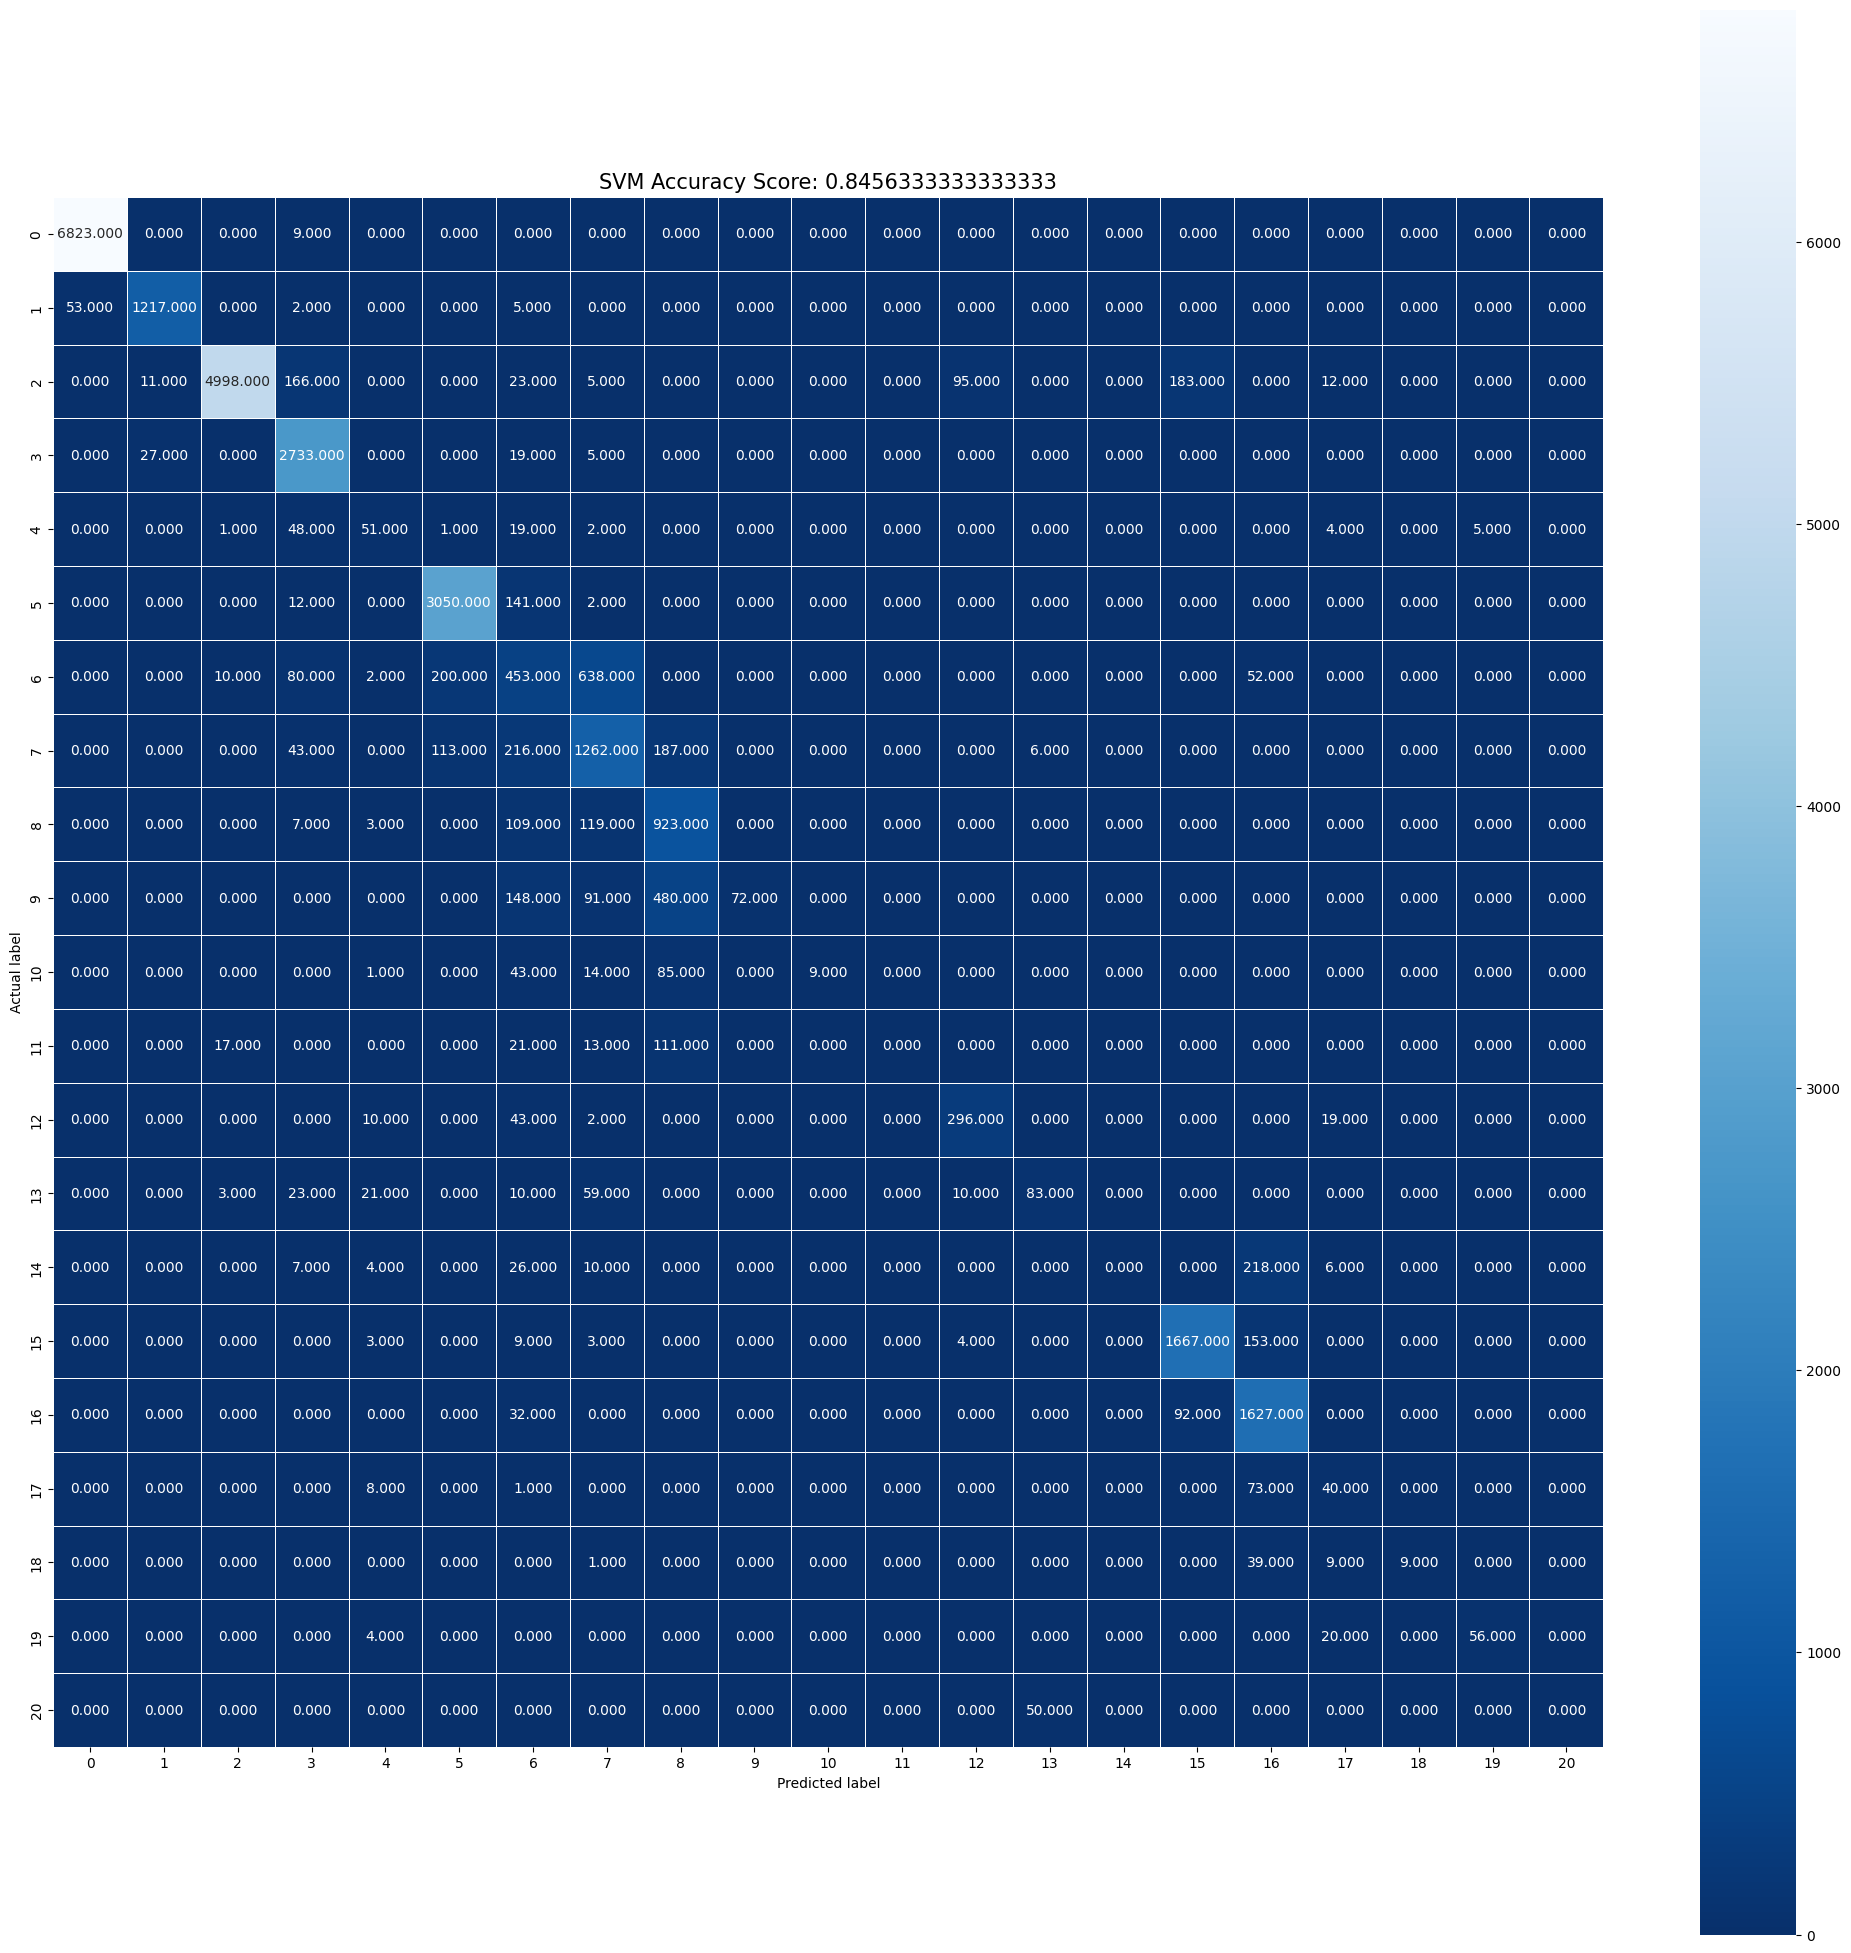

In [38]:
SVM_cm = metrics.confusion_matrix(y_test, y_pred_SVM)
plt.figure(figsize=(25,25))
sns.heatmap(SVM_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.xlabel('Predicted label');
plt.ylabel('Actual label');
title = 'SVM Accuracy Score: {0}'.format(SVM_ac_sc)
plt.title(title, size = 15);

# 4. Xgboost Implementation

In [39]:
import xgboost as xgb

# Built XGBoost Model
model_xgb = xgb.XGBClassifier()

start_time_xgb = time.time()

# Train Model
model_xgb.fit(X_train, y_train)

end_time_xgb = time.time()

# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred_xgb = model_xgb.predict(X_test)


In [40]:
xgb_score = metrics.accuracy_score(y_test, y_pred_xgb)
print("Accuracy: ", xgb_score)
print("Report: ", metrics.classification_report(y_test, y_pred_xgb))

Accuracy:  0.9997
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      6832
           1       1.00      1.00      1.00      1277
           2       1.00      1.00      1.00      5493
           3       1.00      1.00      1.00      2784
           4       0.99      0.98      0.98       131
           5       1.00      1.00      1.00      3205
           6       1.00      1.00      1.00      1435
           7       1.00      1.00      1.00      1827
           8       1.00      1.00      1.00      1161
           9       1.00      1.00      1.00       791
          10       1.00      1.00      1.00       152
          11       1.00      1.00      1.00       162
          12       1.00      0.99      1.00       370
          13       1.00      1.00      1.00       209
          14       1.00      1.00      1.00       271
          15       1.00      1.00      1.00      1839
          16       1.00      1.00      1.00      1751


In [41]:
running_time_xgb = end_time_xgb - start_time_xgb
print("The running time of Xgboost:", running_time_xgb, "second")

The running time of Xgboost: 29.99141025543213 second


In [42]:
xgb_ac_sc = accuracy_score(y_test, y_pred_xgb)
xgb_rc_sc = recall_score(y_test, y_pred_xgb, average="weighted")
xgb_pr_sc = precision_score(y_test, y_pred_xgb,average="weighted")
xgb_f1_sc = f1_score(y_test, y_pred_xgb,average="micro")
print("Accuracy : ",xgb_ac_sc)
print("Recall   : ",xgb_rc_sc)
print("Precision: ",xgb_pr_sc)
print("F1 Score :",xgb_f1_sc)

Accuracy :  0.9997
Recall   :  0.9997
Precision:  0.9997002379961362
F1 Score : 0.9997


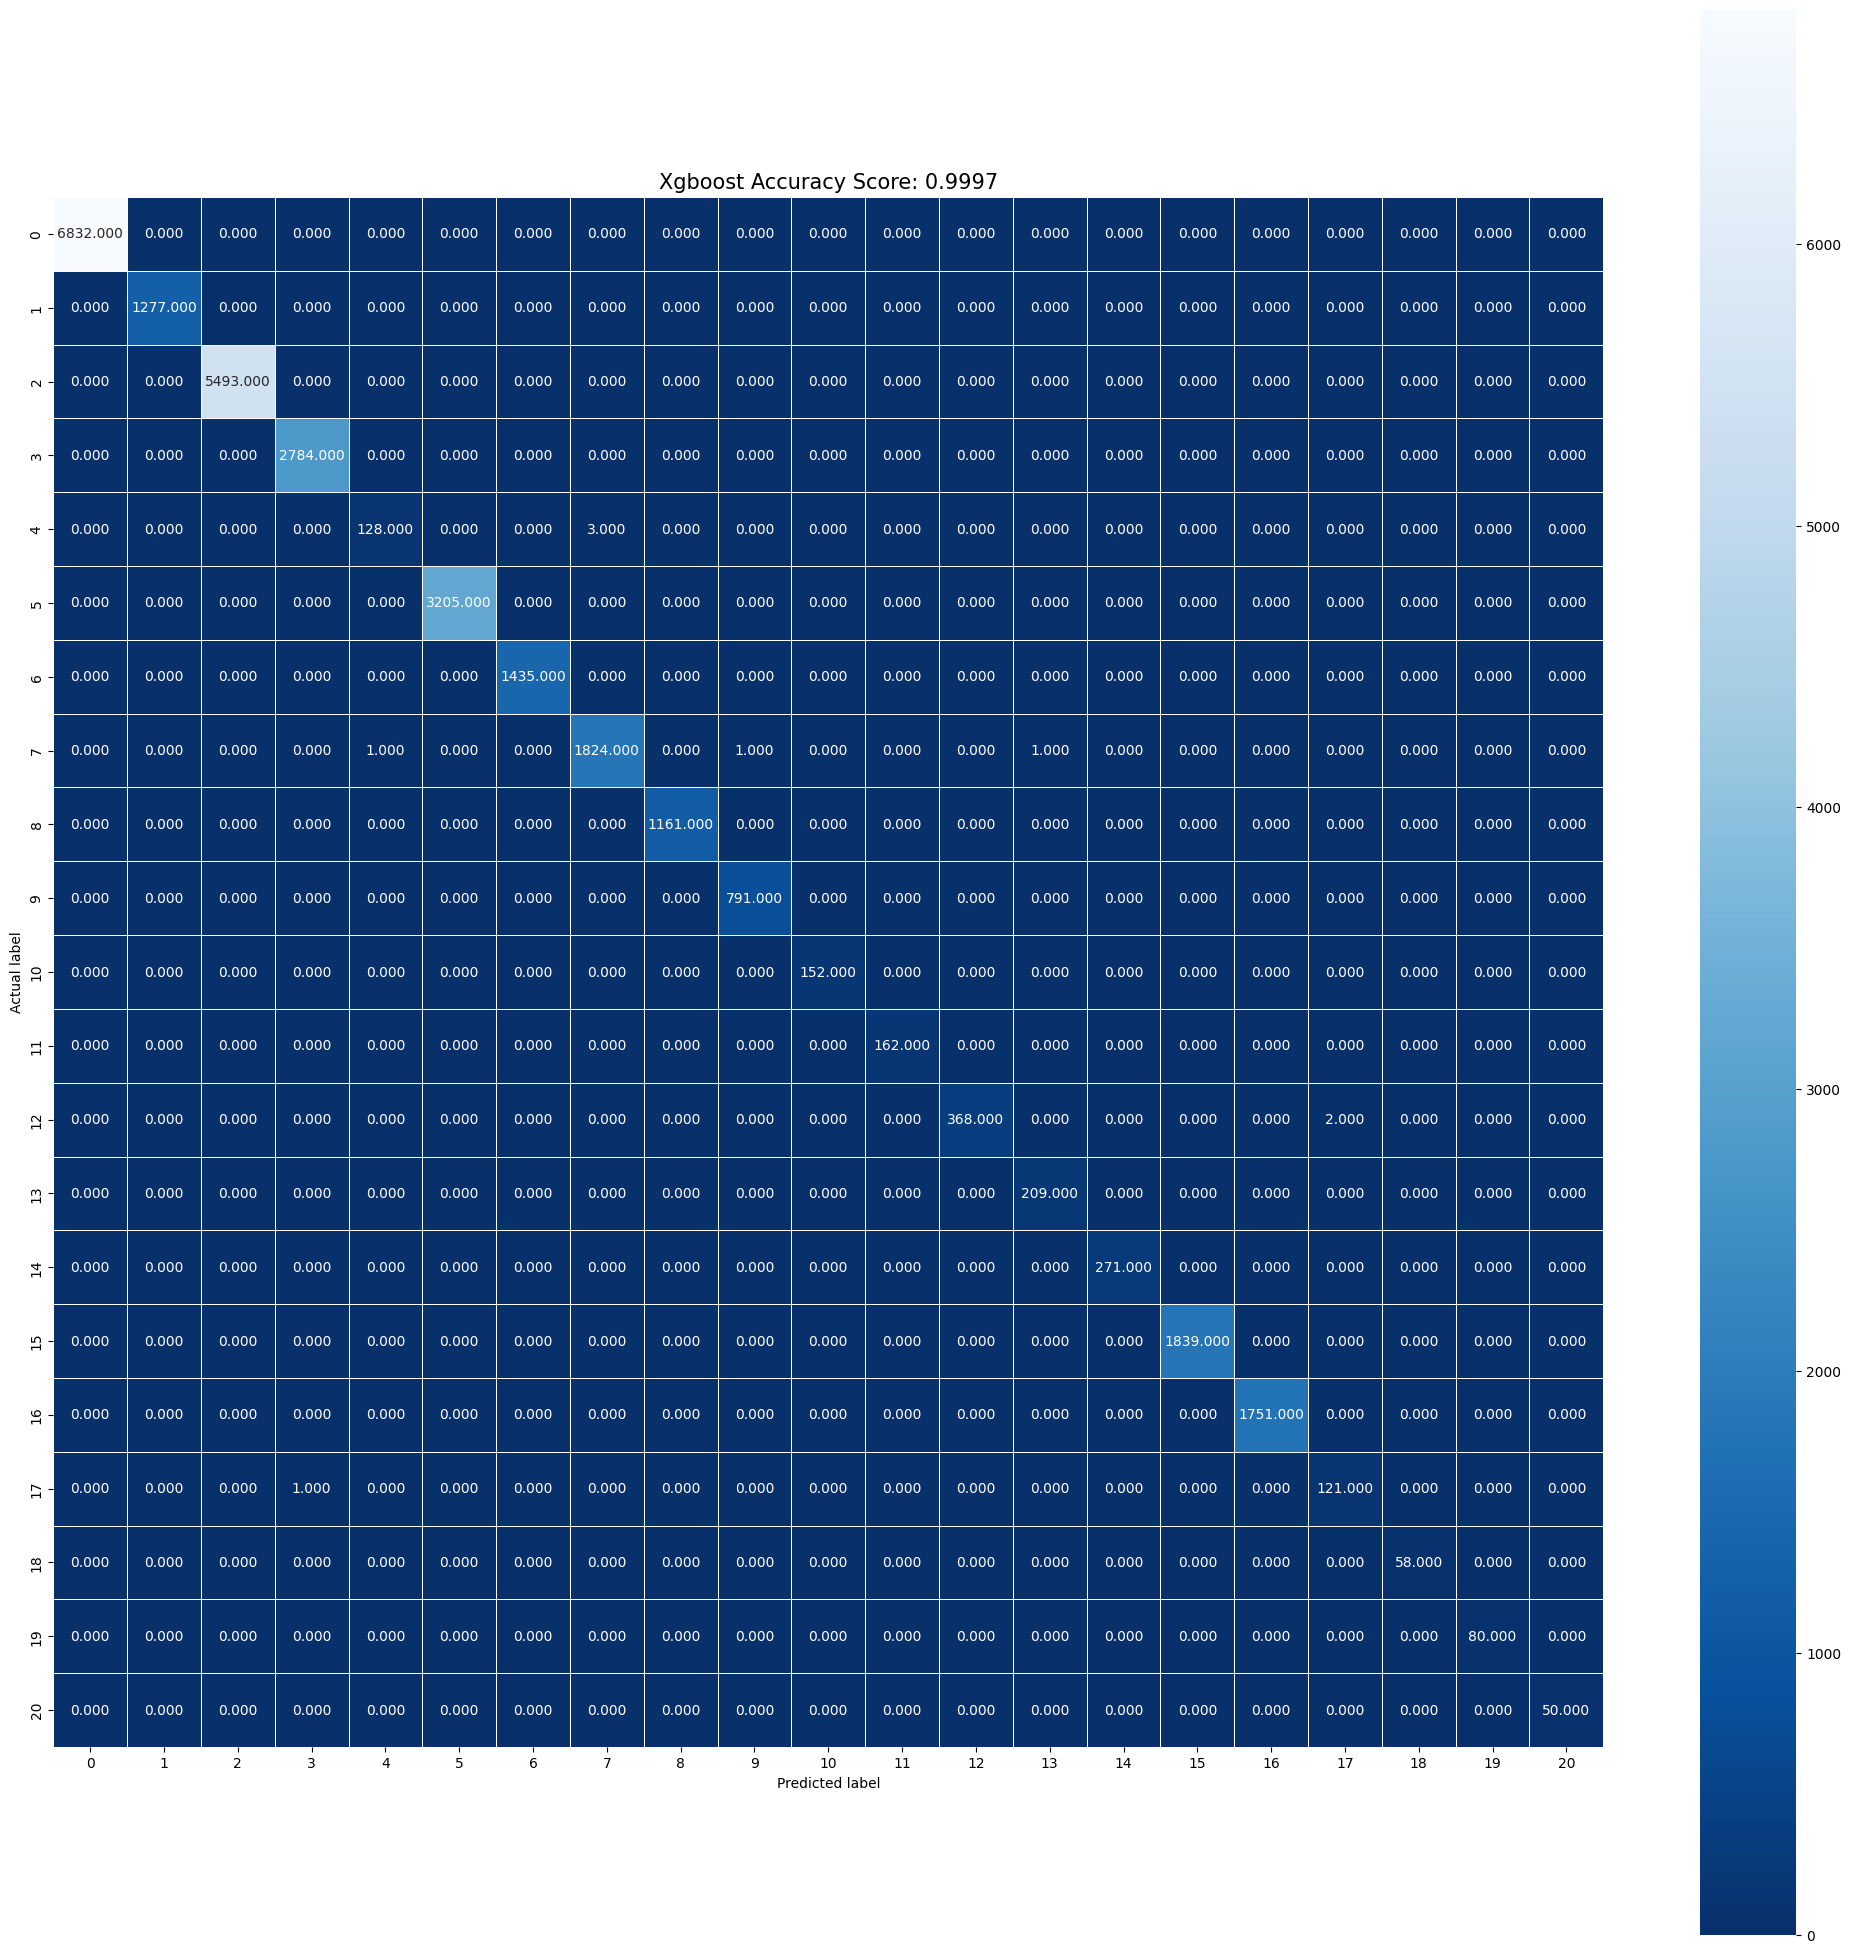

In [43]:
xgb_cm = metrics.confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(25,25))
sns.heatmap(xgb_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.xlabel('Predicted label');
plt.ylabel('Actual label');
title = 'Xgboost Accuracy Score: {0}'.format(xgb_ac_sc)
plt.title(title, size = 15);

# 5. Random Forest Implementation

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf_model = RandomForestClassifier(n_estimators=100)

In [46]:
start_time_RF = time.time()

rf_model.fit(X_train, y_train)

end_time_RF = time.time()

In [47]:
y_pred_RF = rf_model.predict(X_test)

In [48]:
rf_score = metrics.accuracy_score(y_test, y_pred_RF)
print("Accuracy: ", rf_score)
print("Report: ", metrics.classification_report(y_test, y_pred_RF))

Accuracy:  0.9997666666666667
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      6832
           1       1.00      1.00      1.00      1277
           2       1.00      1.00      1.00      5493
           3       1.00      1.00      1.00      2784
           4       0.99      0.98      0.99       131
           5       1.00      1.00      1.00      3205
           6       1.00      1.00      1.00      1435
           7       1.00      1.00      1.00      1827
           8       1.00      1.00      1.00      1161
           9       1.00      1.00      1.00       791
          10       1.00      1.00      1.00       152
          11       1.00      1.00      1.00       162
          12       1.00      1.00      1.00       370
          13       1.00      1.00      1.00       209
          14       1.00      1.00      1.00       271
          15       1.00      1.00      1.00      1839
          16       1.00      1.00      1.0

In [49]:
RF_ac_sc = accuracy_score(y_test, y_pred_RF)
RF_rc_sc = recall_score(y_test, y_pred_RF, average="weighted")
RF_pr_sc = precision_score(y_test, y_pred_RF,average="weighted")
RF_f1_sc = f1_score(y_test, y_pred_RF,average="micro")
print("Accuracy : ",RF_ac_sc)
print("Recall   : ",RF_rc_sc)
print("Precision: ",RF_pr_sc)
print("F1 Score :",RF_f1_sc)

running_time_RF = end_time_RF - start_time_RF
print("The running time of the model: ", running_time_RF, "second")

Accuracy :  0.9997666666666667
Recall   :  0.9997666666666667
Precision:  0.9997671775674835
F1 Score : 0.9997666666666667
The running time of the model:  2.6570217609405518 second


Text(0.5, 1.0, 'Random Forest Accuracy Score: 0.9997666666666667')

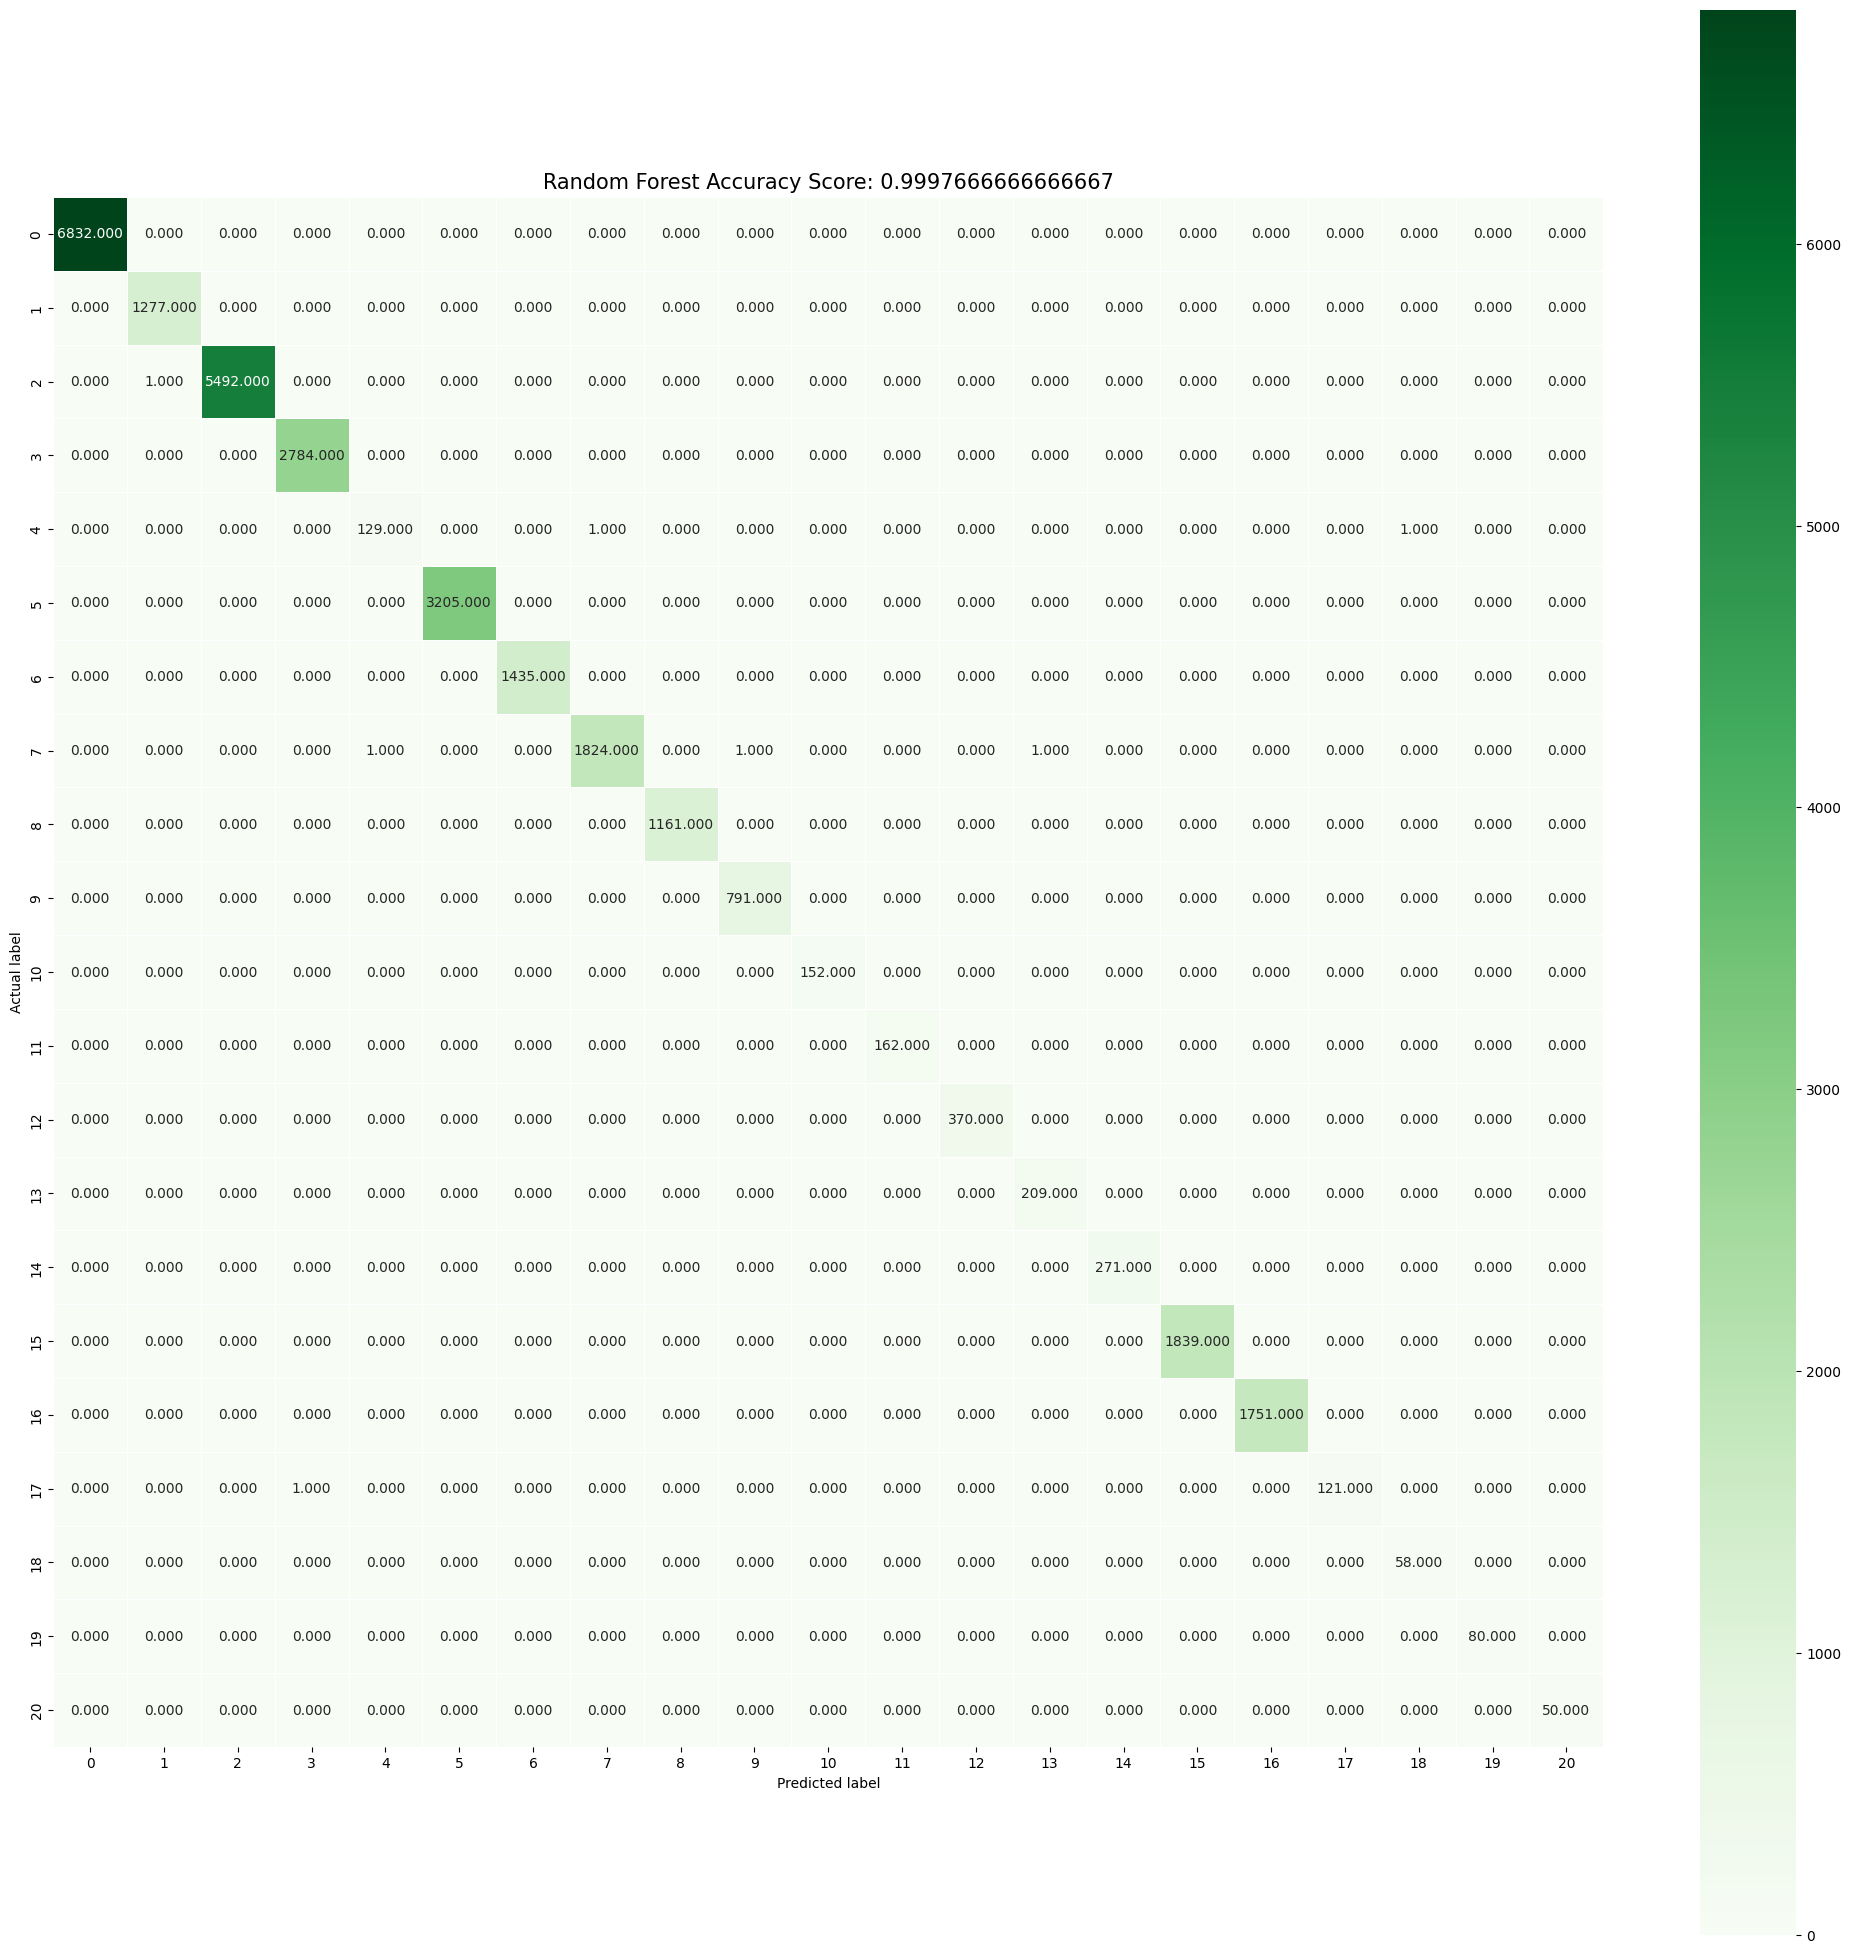

In [50]:
RF_cm = metrics.confusion_matrix(y_test, y_pred_RF)
plt.figure(figsize=(25,25))
sns.heatmap(RF_cm, annot=True, fmt=".3f", linewidths=.5, square =True, cmap ='Greens')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
title = 'Random Forest Accuracy Score: {0}'.format(RF_ac_sc)
plt.title(title, size=15)

# 6. Logistic Regression Implementation

In [51]:
from sklearn.linear_model import LogisticRegression

# Built Logistic Regression
model_LR = LogisticRegression()

start_time_LR = time.time()

# Train Model
model_LR.fit(X_train, y_train)

end_time_LR = time.time()

# Predict
y_pred_LR = model_LR.predict(X_test)


D:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
LR_score = metrics.accuracy_score(y_test, y_pred_LR)
print("Accuracy: ", LR_score)
print("Report: ", metrics.classification_report(y_test, y_pred_LR))

Accuracy:  0.5727333333333333
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      6832
           1       0.54      0.18      0.27      1277
           2       0.40      0.85      0.54      5493
           3       0.00      0.00      0.00      2784
           4       0.11      0.02      0.03       131
           5       0.38      0.46      0.42      3205
           6       0.16      0.14      0.15      1435
           7       0.60      0.39      0.47      1827
           8       0.00      0.00      0.00      1161
           9       0.00      0.00      0.00       791
          10       0.00      0.00      0.00       152
          11       0.00      0.00      0.00       162
          12       0.00      0.00      0.00       370
          13       0.00      0.00      0.00       209
          14       0.00      0.00      0.00       271
          15       0.76      0.73      0.74      1839
          16       0.61      0.98      0.7

D:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
running_time_LR = end_time_LR - start_time_LR
print("The running time of the model: ", running_time_LR, "second")

The running time of the model:  6.137091875076294 second


In [54]:
LR_ac_sc = accuracy_score(y_test, y_pred_LR)
LR_rc_sc = recall_score(y_test, y_pred_LR, average="weighted")
LR_pr_sc = precision_score(y_test, y_pred_LR,average="weighted")
LR_f1_sc = f1_score(y_test, y_pred_LR,average="micro")
print("Accuracy : ",LR_ac_sc)
print("Recall   : ",LR_rc_sc)
print("Precision: ",LR_pr_sc)
print("F1 Score :",LR_f1_sc)


Accuracy :  0.5727333333333333
Recall   :  0.5727333333333333
Precision:  0.4903256178201162
F1 Score : 0.5727333333333333


D:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Logistic Regression Accuracy Score: 0.5727333333333333')

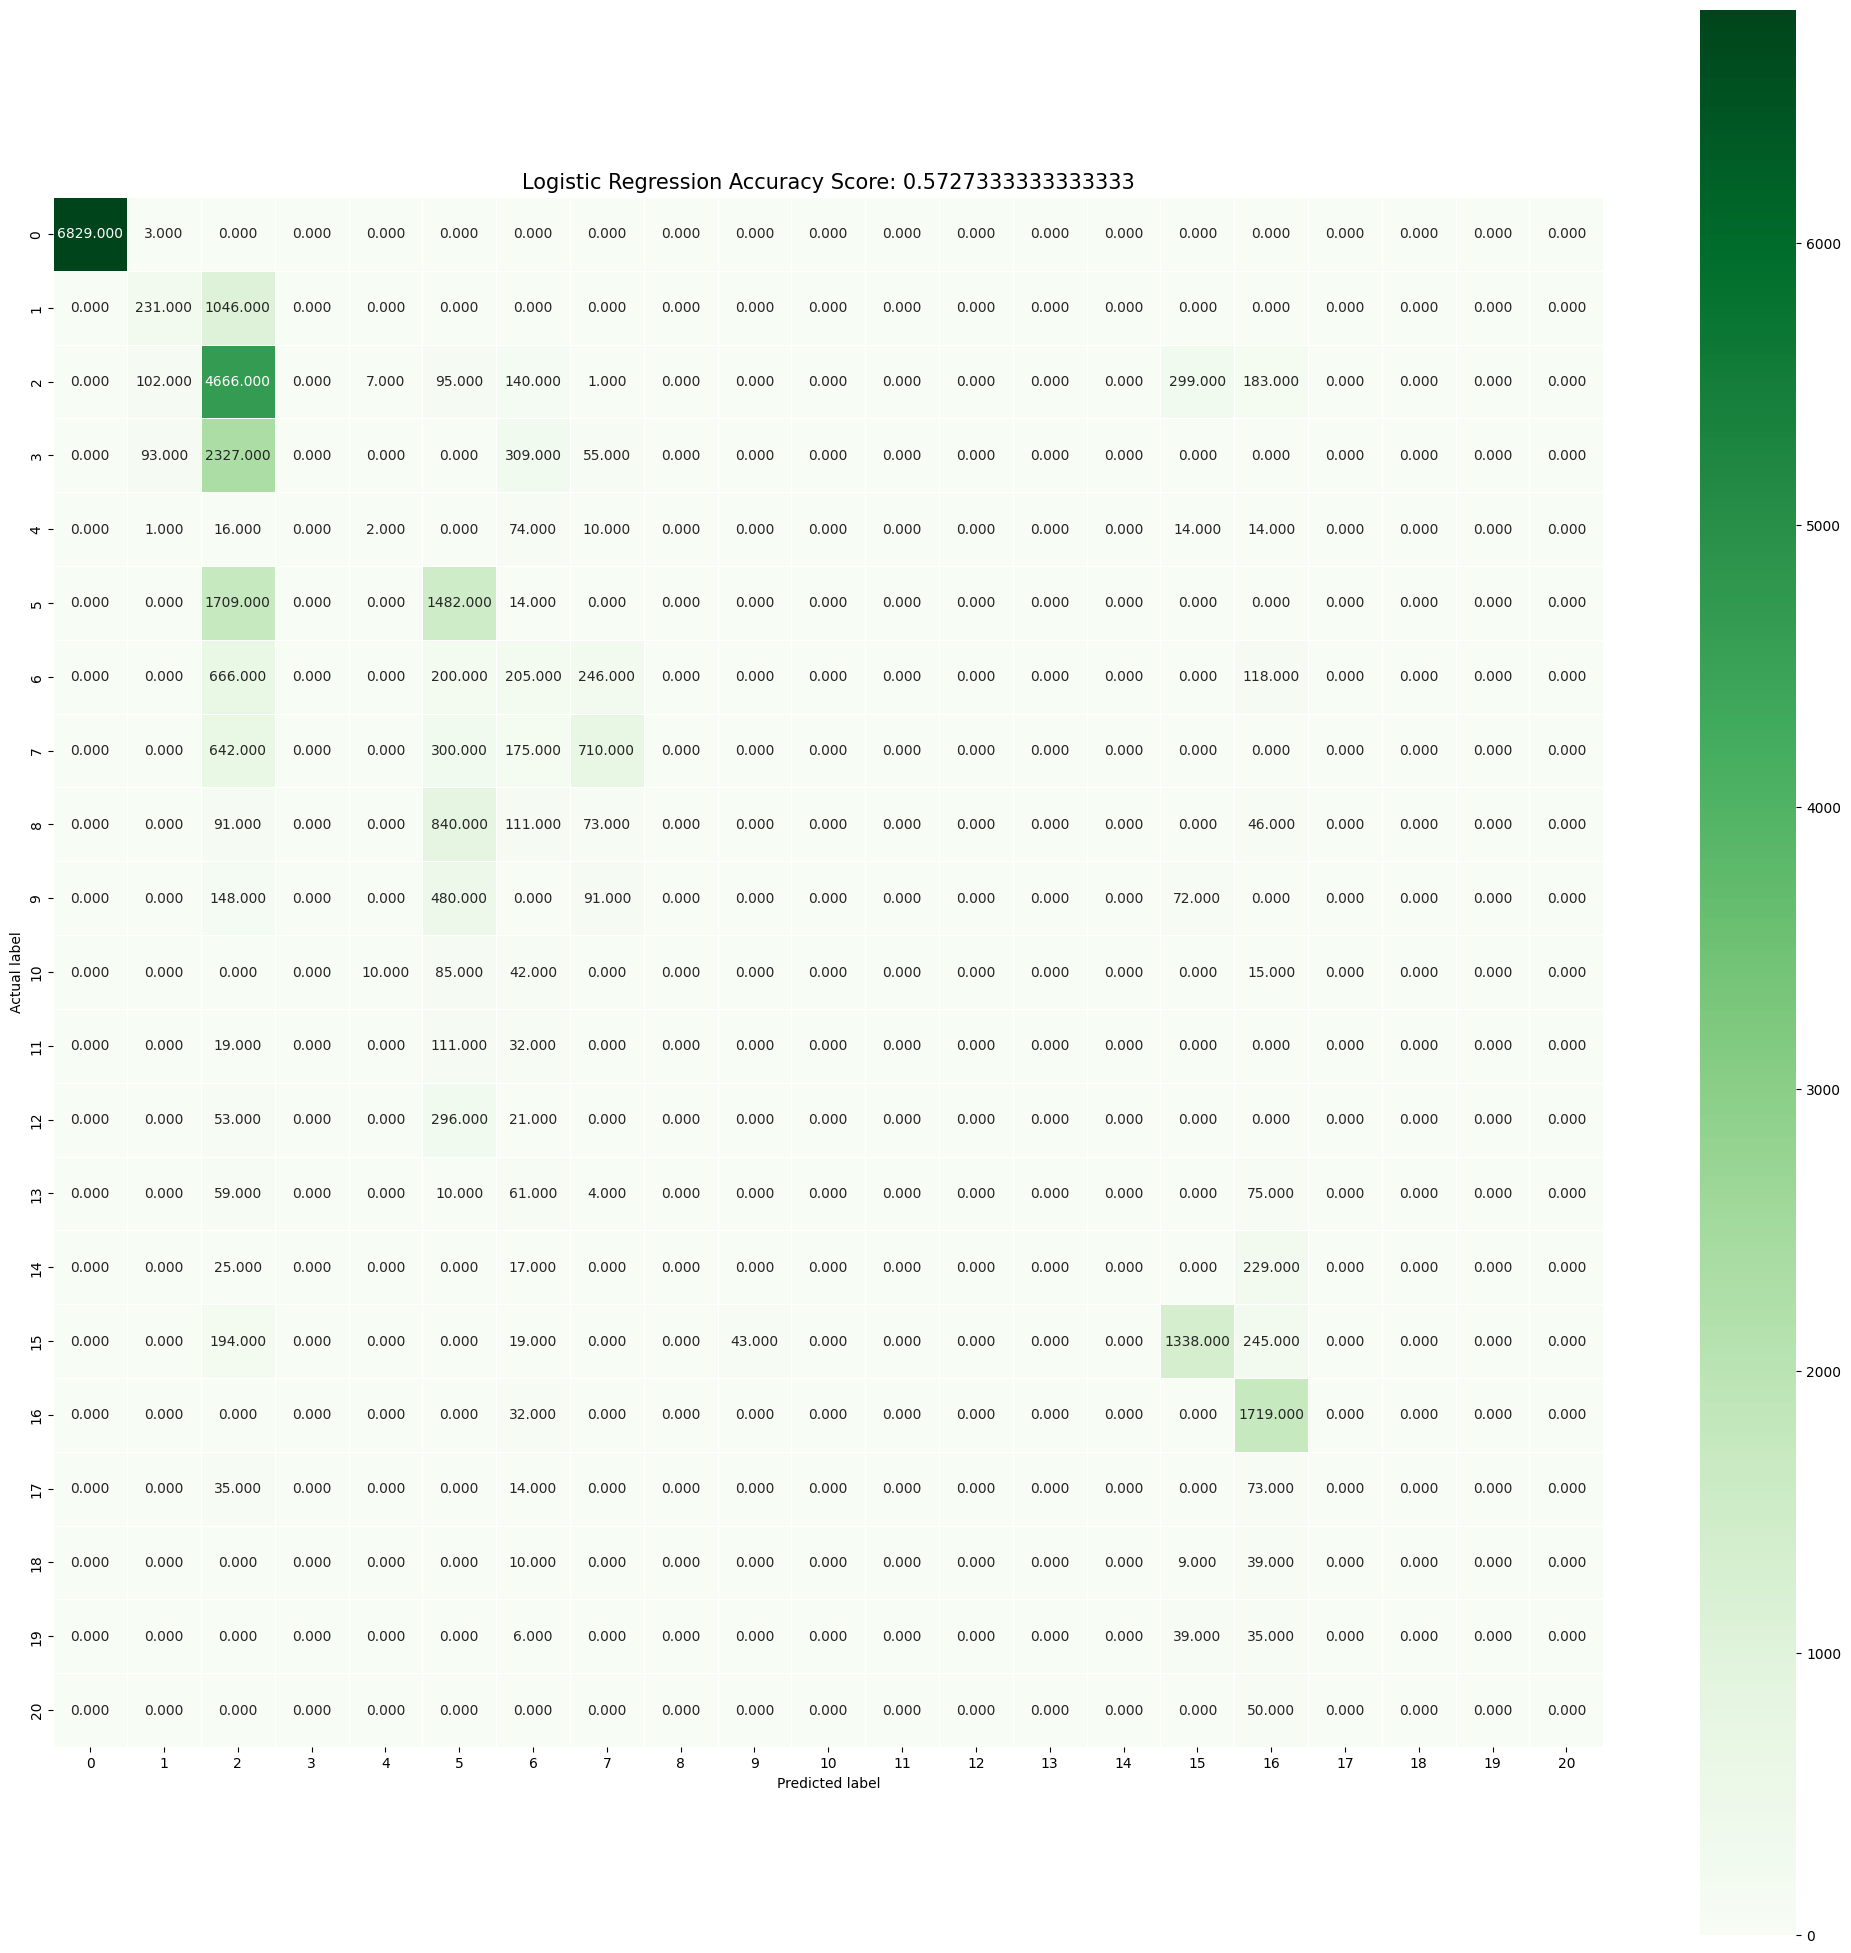

In [55]:
LR_cm = metrics.confusion_matrix(y_test, y_pred_LR)
plt.figure(figsize=(25,25))
sns.heatmap(LR_cm, annot=True, fmt=".3f", linewidths=.5, square =True, cmap ='Greens')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
title = 'Logistic Regression Accuracy Score: {0}'.format(LR_ac_sc)
plt.title(title, size=15)

# 7. KNN Implementation

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [57]:
X1 = df[['IUCR', 'Description', 'FBI Code']].iloc[:,:].values
inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters = n, init='random')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

D:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change

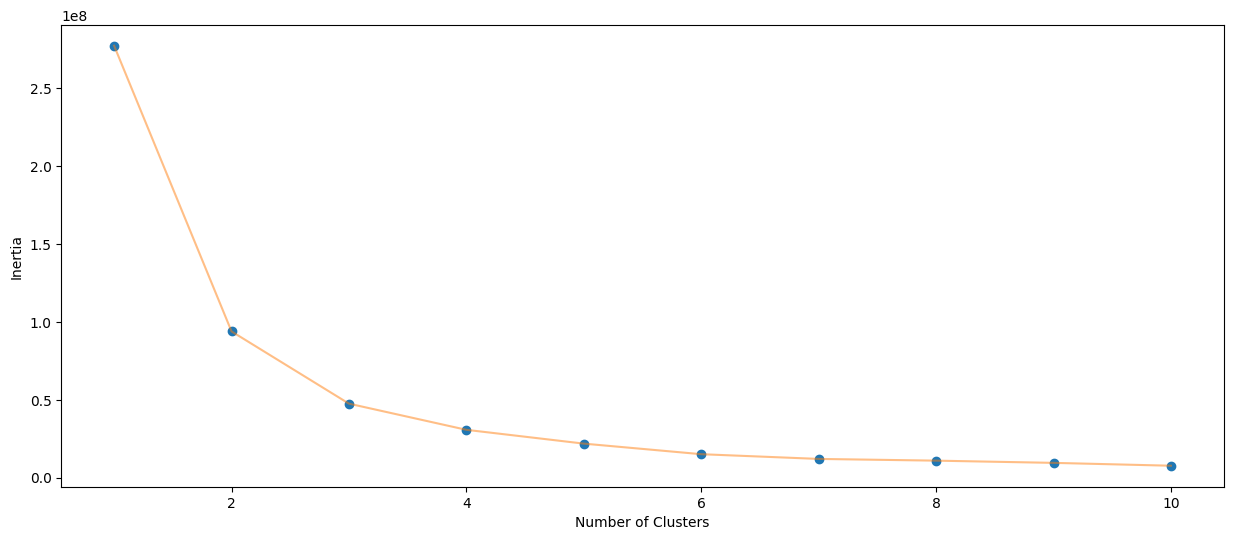

In [58]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [59]:
knn = KNeighborsClassifier(n_neighbors=3)

In [60]:
start_time_knn = time.time()

knn.fit(X_train, y_train)

end_time_knn = time.time()

In [61]:
y_pred_knn = knn.predict(X_test)

In [62]:
KNN_ac_sc = accuracy_score(y_test, y_pred_knn)
KNN_rc_sc = recall_score(y_test, y_pred_knn, average="weighted")
KNN_pr_sc = precision_score(y_test, y_pred_knn,average="weighted")
KNN_f1_sc = f1_score(y_test, y_pred_knn,average="micro")
print("Accuracy : ",KNN_ac_sc)
print("Recall   : ",KNN_rc_sc)
print("Precision: ",KNN_pr_sc)
print("F1 Score :",KNN_f1_sc)

running_time_KNN = end_time_knn - start_time_knn
print("The running time of the model: ", running_time_KNN, "second")

Accuracy :  0.9991
Recall   :  0.9991
Precision:  0.99910238186432
F1 Score : 0.9991
The running time of the model:  0.13699722290039062 second


In [63]:
print("Accuracy: ", KNN_ac_sc)
print("Report: ", metrics.classification_report(y_test, y_pred_knn))

Accuracy:  0.9991
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      6832
           1       1.00      1.00      1.00      1277
           2       1.00      1.00      1.00      5493
           3       1.00      1.00      1.00      2784
           4       0.98      0.94      0.96       131
           5       1.00      1.00      1.00      3205
           6       1.00      1.00      1.00      1435
           7       1.00      1.00      1.00      1827
           8       1.00      1.00      1.00      1161
           9       1.00      1.00      1.00       791
          10       1.00      0.99      1.00       152
          11       0.99      0.99      0.99       162
          12       1.00      0.99      1.00       370
          13       1.00      1.00      1.00       209
          14       1.00      1.00      1.00       271
          15       1.00      1.00      1.00      1839
          16       1.00      1.00      1.00      1751


Text(0.5, 1.0, 'KNN Accuracy Score: 0.9991')

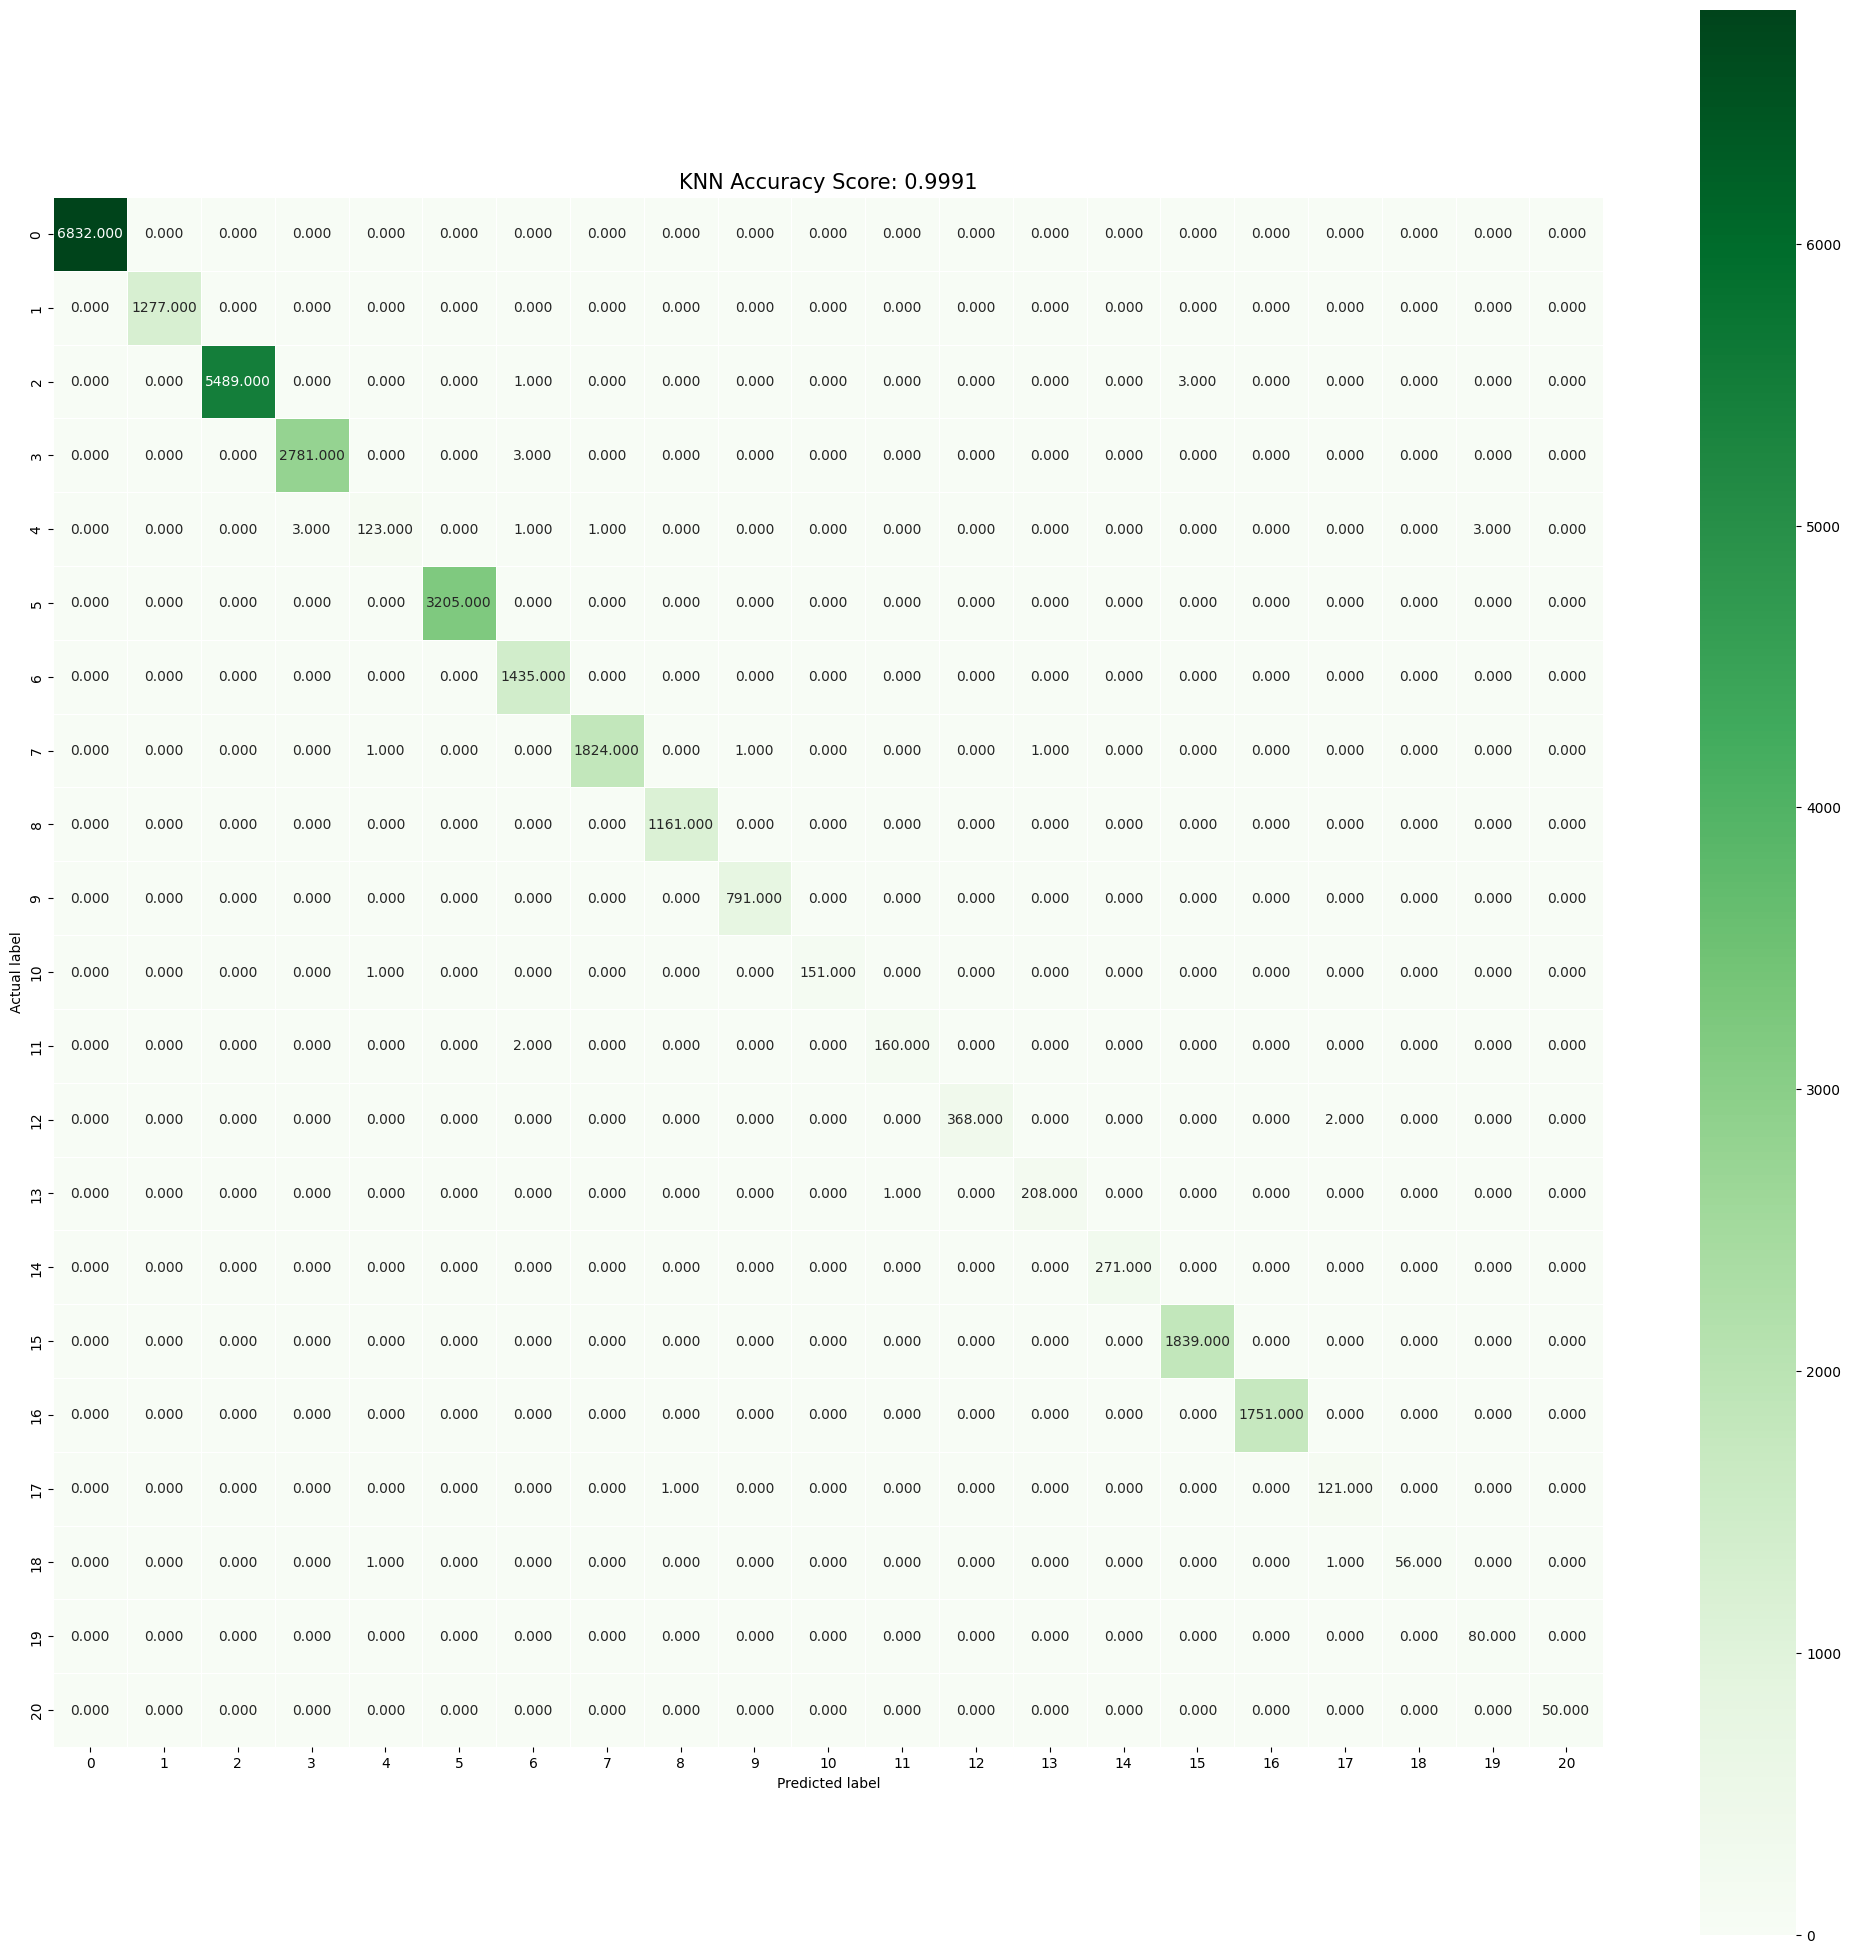

In [64]:
knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(25,25))
sns.heatmap(knn_cm, annot=True, fmt=".3f", linewidths=.5, square =True, cmap ='Greens')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
title = 'KNN Accuracy Score: {0}'.format(KNN_ac_sc)
plt.title(title, size=15)

# The running time

In [65]:
df_time = pd.DataFrame(data=[('Decision Tree (ID3 Tree)',running_time_Decision_Tree), ('Decision Tree (Cart)',running_time_Decision_Tree_Cart), ('Naive Bayes',running_time_Bayes),
                             ('SVM', running_time_SVM), ('Random Forest',running_time_RF), ('Logistic Regression',running_time_LR),
                             ('Xgboost',running_time_xgb), ('KNN', running_time_KNN)],
                                       columns=['Model', 'Time'])

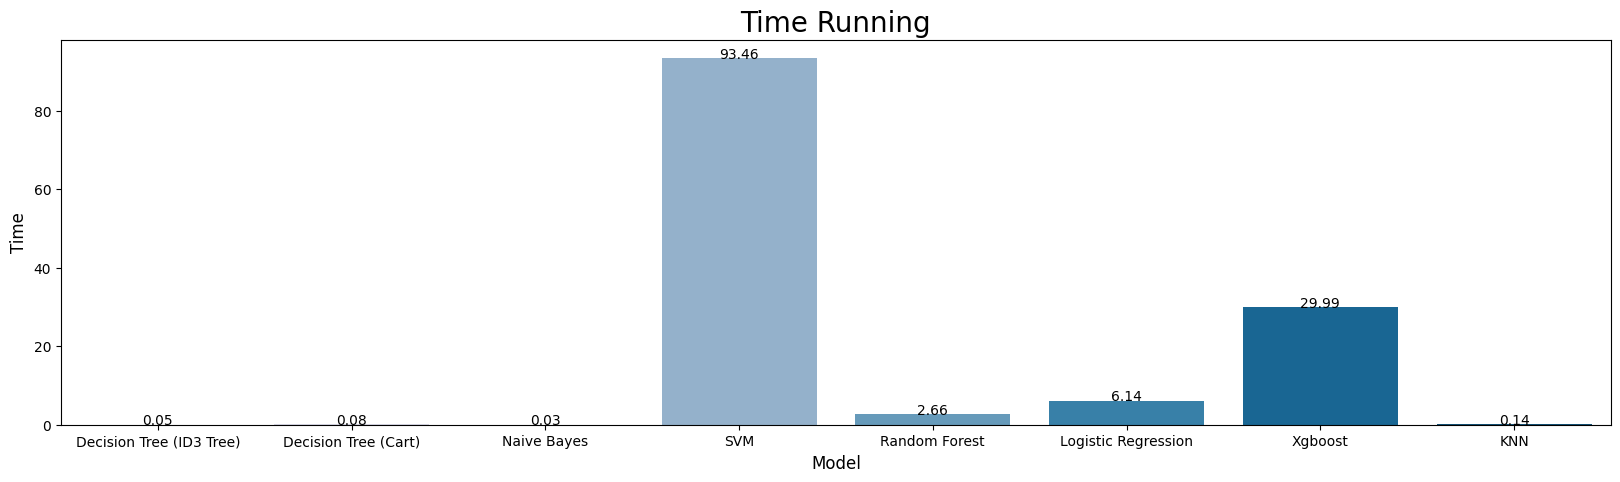

In [66]:
plt.style.use('default')
plt.figure(figsize=(20,5))
p=sns.barplot(x='Model', y='Time', data=df_time, palette='PuBu')
plt.title('Time Running', fontsize = 20)
plt.xlabel('Model', fontsize = 12)
plt.ylabel('Time', fontsize = 12)
for index, row in df_time.iterrows():
    p.text(x=row.name, y=row.Time, s=round(row.Time,2), color='black', horizontalalignment='center');

# Accuracy

In [67]:
df_Accuracy = pd.DataFrame(data=[('Decision Tree (ID3 Tree)',DecisionTree_ac_sc), ('Decision Tree (Cart)',CART_ac_sc), ('Naive Bayes',Bayes_ac_sc),
                             ('SVM', SVM_ac_sc), ('Random Forest',RF_ac_sc), ('Logistic Regression',LR_ac_sc),
                             ('Xgboost',xgb_ac_sc), ('KNN', KNN_ac_sc)],
                                       columns=['Model', 'Accuracy'])

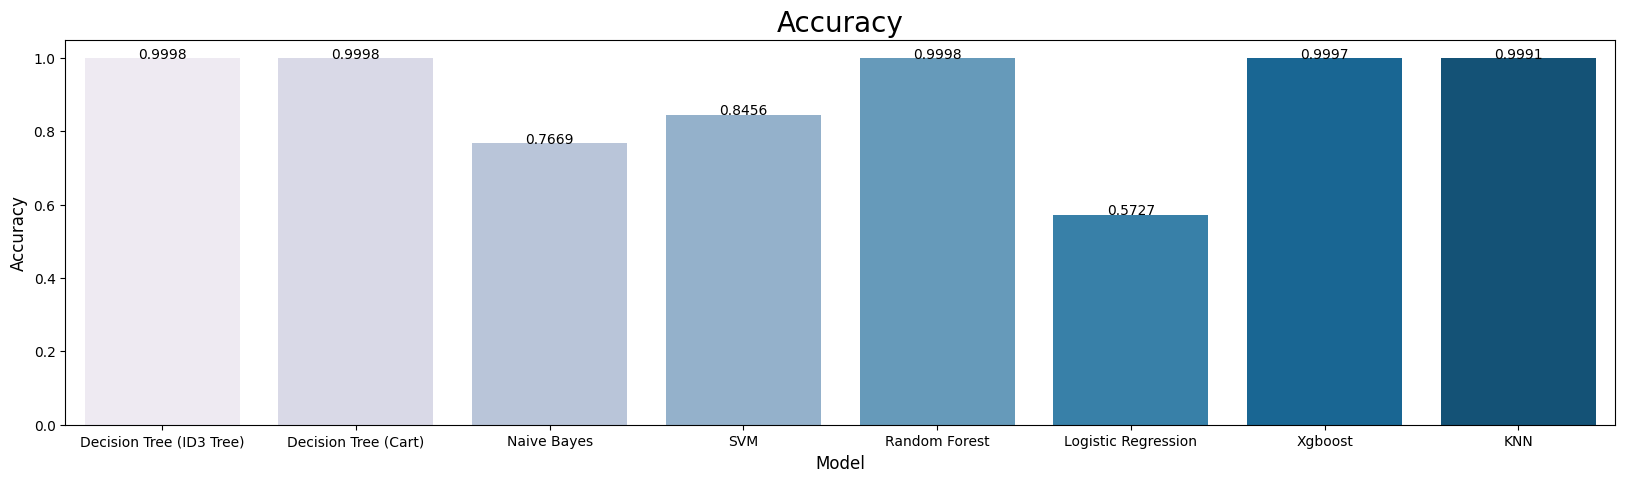

In [68]:
plt.style.use('default')
plt.figure(figsize=(20,5))
p=sns.barplot(x='Model', y='Accuracy', data=df_Accuracy, palette='PuBu')
plt.title('Accuracy', fontsize = 20)
plt.xlabel('Model', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
for index, row in df_Accuracy.iterrows():
    p.text(x=row.name, y=row.Accuracy, s=round(row.Accuracy,4), color='black', horizontalalignment='center');

# Recall

In [69]:
df_Recall = pd.DataFrame(data=[('Decision Tree (ID3 Tree)',DecisionTree_rc_sc), ('Decision Tree (Cart)',CART_rc_sc), ('Naive Bayes',Bayes_rc_sc),
                             ('SVM', SVM_rc_sc), ('Random Forest',RF_rc_sc), ('Logistic Regression',LR_rc_sc),
                             ('Xgboost',xgb_rc_sc), ('KNN', KNN_rc_sc)],
                                       columns=['Model', 'Recall'])

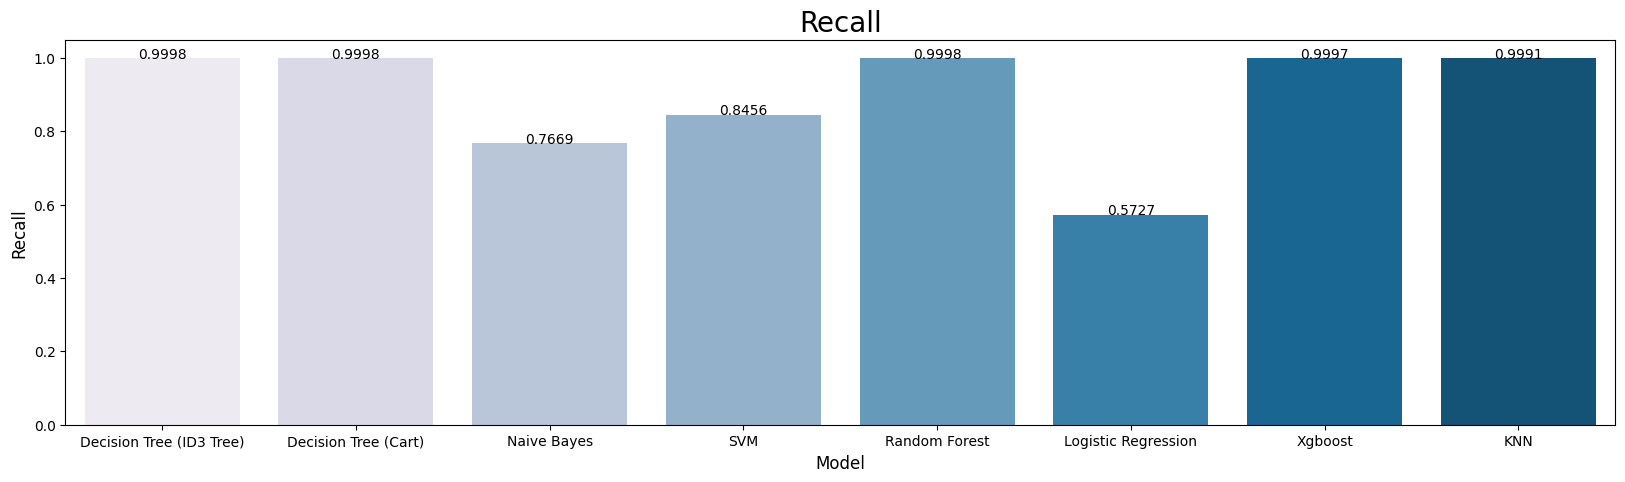

In [70]:
plt.style.use('default')
plt.figure(figsize=(20,5))
p=sns.barplot(x='Model', y='Recall', data=df_Recall, palette='PuBu')
plt.title('Recall', fontsize = 20)
plt.xlabel('Model', fontsize = 12)
plt.ylabel('Recall', fontsize = 12)
for index, row in df_Recall.iterrows():
    p.text(x=row.name, y=row.Recall, s=round(row.Recall,4), color='black', horizontalalignment='center');

# Precision

In [71]:
df_Precision = pd.DataFrame(data=[('Decision Tree (ID3 Tree)',DecisionTree_pr_sc), ('Decision Tree (Cart)',CART_pr_sc), ('Naive Bayes',Bayes_pr_sc),
                             ('SVM', SVM_pr_sc), ('Random Forest',RF_pr_sc), ('Logistic Regression',LR_pr_sc),
                             ('Xgboost',xgb_pr_sc), ('KNN', KNN_pr_sc)],
                                       columns=['Model', 'Precision'])

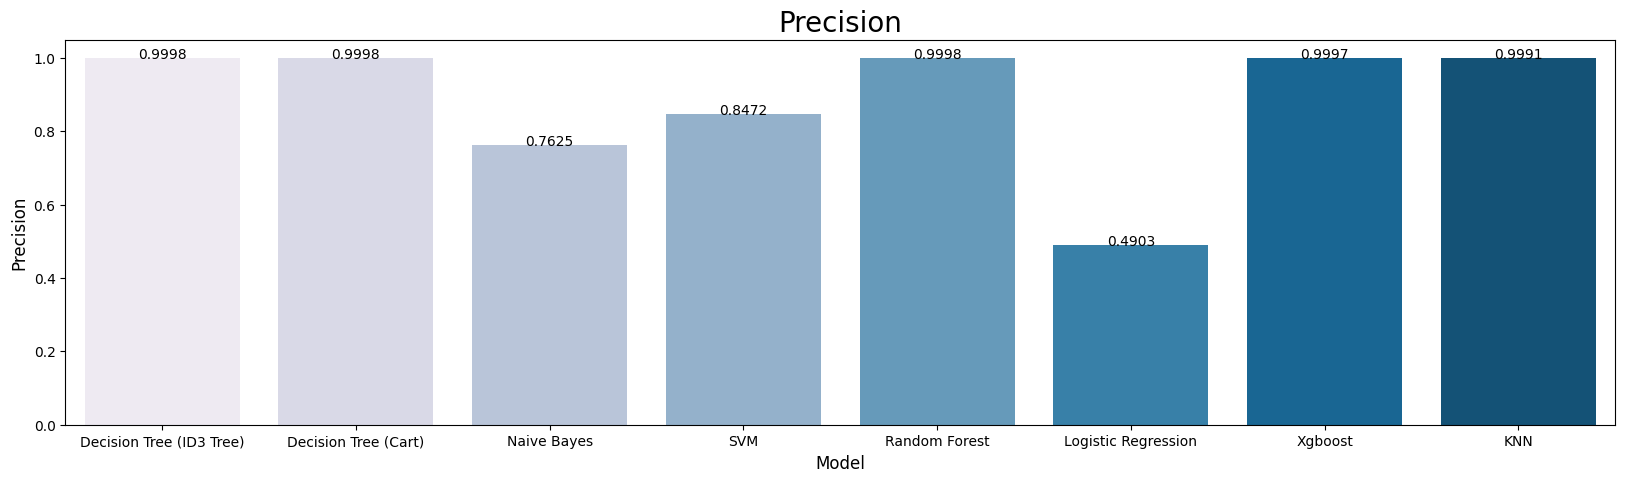

In [72]:
plt.style.use('default')
plt.figure(figsize=(20,5))
p=sns.barplot(x='Model', y='Precision', data=df_Precision, palette='PuBu')
plt.title('Precision', fontsize = 20)
plt.xlabel('Model', fontsize = 12)
plt.ylabel('Precision', fontsize = 12)
for index, row in df_Precision.iterrows():
    p.text(x=row.name, y=row.Precision, s=round(row.Precision,4), color='black', horizontalalignment='center');

# F1 Score

In [73]:
df_F1_Score = pd.DataFrame(data=[('Decision Tree (ID3 Tree)',DecisionTree_f1_sc), ('Decision Tree (Cart)',CART_f1_sc), ('Naive Bayes',Bayes_f1_sc),
                             ('SVM', SVM_f1_sc), ('Random Forest',RF_f1_sc), ('Logistic Regression',LR_f1_sc),
                             ('Xgboost',xgb_f1_sc), ('KNN', KNN_f1_sc)],
                                       columns=['Model', 'F1_Score'])

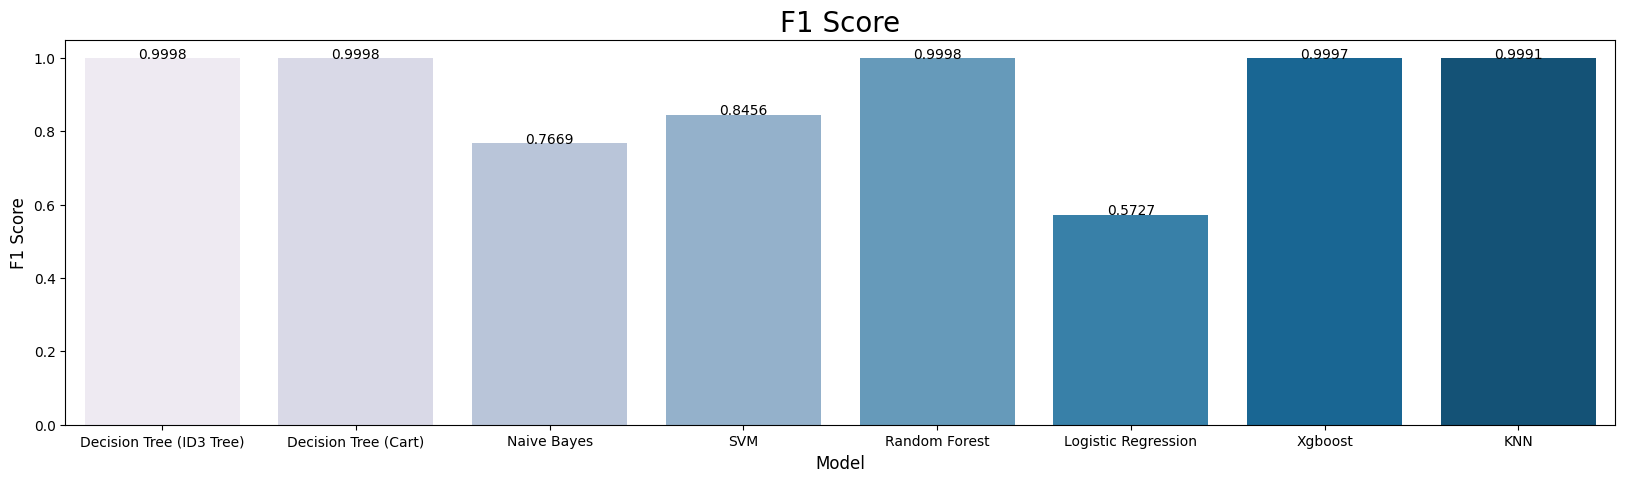

In [74]:
plt.style.use('default')
plt.figure(figsize=(20,5))
p=sns.barplot(x='Model', y='F1_Score', data=df_F1_Score, palette='PuBu')
plt.title('F1 Score', fontsize = 20)
plt.xlabel('Model', fontsize = 12)
plt.ylabel('F1 Score', fontsize = 12)
for index, row in df_F1_Score.iterrows():
    p.text(x=row.name, y=row.F1_Score, s=round(row.F1_Score,4), color='black', horizontalalignment='center');